<a href="https://colab.research.google.com/github/SeoulTechPSE/EngMath/blob/master/ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Rendering sympy equations requires MathJax to be available within each cell output. 
# The following is a function that will make this happen for Colab.

if 'google.colab' in str(get_ipython()):
    
    from sympy import init_printing
    from sympy.printing import latex

    def colab_LaTeX_printer(exp, **options):  
        from google.colab.output._publish import javascript 

        url_ = "https://colab.research.google.com/static/mathjax/MathJax.js?"
        cfg_ = "config=TeX-MML-AM_HTMLorMML" # "config=default"

        javascript(url=url_+cfg_)

        return latex(exp, **options)

    init_printing(use_latex="mathjax", latex_printer=colab_LaTeX_printer)
else:
    import sympy
    sympy.init_printing()

# Chapter 8. Matrices 

### Contents

* Matrix Algebra
* Systems of Linear Algebraic Equations
* Rank of Matrix
* Determinants
* Properties of Determinants
* Inverse of Matrix
* Cramer's Rule
* The Eigenvalue Problem        

$~$

* Powers of Matrices
* Orthogonal Matrices
* Approximation of Eigenvalues
* Diagonalization
* LU-factorization
* Applications

## 8.1 $~$ Matrix Algebra

* A **matrix** is any rectangular array of numbers or functions

 >$\begin{pmatrix}
    a_{11} & a_{12} & \cdots & a_{1n}\\ 
    a_{21} & a_{22} & \ddots & a_{2n} \\ 
    \vdots & \ddots & \ddots & \vdots \\ 
    a_{m1} & a_{m2} & \cdots & a_{mn}
  \end{pmatrix}$  
   
  * The numbers or functions in the array are **entries** or **elements**
  * An $n \times n$ matrix  is a **square** matrix of **order $n$**

* **Column** and **row vectors** are $n \times 1$ and $1 \times n$ matrices

  >$
  \begin{pmatrix}
    a_1\\ 
    a_2\\ 
    \vdots\\ 
    a_n
  \end{pmatrix},\;
  \begin{pmatrix}
    a_1 & a_2 & \cdots & a_n
  \end{pmatrix}  
  $

* **Equality of Matrices** 

  $\mathbf{A} = \left(a_{ij}\right)_{m \times n}\text{ }$ and $\text{ }\mathbf{B} = \left(b_{ij}\right)_{m \times n}\text{ }$ are *equal* $~$if $a_{ij}=b_{ij}$ for each $i$ and $j$
  
* **Matrix Addition**

  $\mathbf{A} +\mathbf{B} = \left(a_{ij} +b_{ij}\right)_{m \times n}$
  
* **Scalar Multiplication**

  $k\mathbf{A} = \left(ka_{ij}\right)_{m \times n}$

* **Properties of Matrix Addition and Scalar Multiplication**

  Suppose $\mathbf{A}$, $\mathbf{B}$, and $\mathbf{C}$ are $m \times n$ matrices and $k_1$ and $k_2$ are scalars. Then

  >$\begin{align*}
    &\mathbf{A} +\mathbf{B} = \mathbf{B} +\mathbf{A} \\ 
    &\mathbf{A} +\left(\mathbf{B} +\mathbf{C}\right) = \left(\mathbf{A} +\mathbf{B}\right) +\mathbf{C} \\
    &\left(k_1 k_2\right)\mathbf{A} = k_1 \left(k_2\mathbf{A}\right) \\
    &k_1\left(\mathbf{A} +\mathbf{B}\right)=k_1\mathbf{A} +k_1\mathbf{B} \\
    &\left(k_1 +k_2\right)\mathbf{A} = k_1 \mathbf{A} +k_2\mathbf{A}  
  \end{align*}$

* **Matrix multiplication** 
  
  >$\displaystyle\mathbf{A}\mathbf{B}=\left(\sum_{k=1}^p a_{ik} b_{kj}\right)_{m \times n}$
  
  where $\mathbf{A}$ is an $m \times p$ matrix, $~\mathbf{B}$ is a $p \times n$ matrix, and
  $~\mathbf{A}\mathbf{B}$ is the $m \times n$ matrix
  
  * In general, $~\mathbf{A}\mathbf{B}\neq\mathbf{B}\mathbf{A}$
  
  * **Associative Law:** $~\mathbf{A}\left(\mathbf{B}\mathbf{C}\right)=\left(\mathbf{A}\mathbf{B}\right)\mathbf{C}$ 
  
  * **Distributive Law:** $~\mathbf{A}\left(\mathbf{B}+\mathbf{C}\right)=\mathbf{A}\mathbf{B} +\mathbf{A}\mathbf{C}$ 

* **Transpose of a Matrix**

  >$\mathbf{A}^T =
  \begin{pmatrix}
    a_{11} & a_{21} & \cdots & a_{m1}\\ 
    a_{12} & a_{22} & \ddots & a_{m2} \\ 
    \vdots & \ddots & \ddots & \vdots \\ 
    a_{1n} & a_{2n} & \cdots & a_{mn}
  \end{pmatrix}  
  $
  
* **Properties of Transpose**

  >$
  \begin{align*}
     &\left(\mathbf{A}^T\right)^T=\mathbf{A} \\ 
     &\left(\mathbf{A} +\mathbf{B}\right)^T=\mathbf{A}^T +\mathbf{B}^T \\ 
     &\left(\mathbf{A}\mathbf{B}\right)^T=\mathbf{B}^T\mathbf{A}^T \\ 
     &\left(k\mathbf{A}\right)^T=k\mathbf{A}^T
   \end{align*}$

* **Special Matrices**

  * In a **zero matrix**, $~$all entries are zeros
  
  * In a **triangular matrix**, $~$all entries above or below the main diagonal are zeros (lower triangular or upper triangular)
  
  * In a **diagonal matrix**, $~$all entries not on the main diagonal are zeros
  
  * A **scalar matrix** is a diagonal one where all entries on the main diagonal are equal.
    $~$If those entries are $1$'s, it is an **identity matrix**, $\mathbf{I}$ 
    (or $\mathbf{I}_n$ when there is a need to emphasize the order of the matrix)
    
  * An $n \times n$ matrix $\mathbf{A}$ is **symmetric** $~$if $\mathbf{A}^T=\mathbf{A}$

### Exercises 8.1

* If $\mathbf{A}=\begin{pmatrix}
 \phantom{-}2 & -3 \\ 
 -5 & \phantom{-}4 
\end{pmatrix}$ and $\mathbf{B}=\begin{pmatrix}
 -1 & 6 \\ 
 \phantom{-}3 & 2 
\end{pmatrix}$, $~$find $~$(a) $\mathbf{AB}$, $~$(b) $\mathbf{BA}$, $~$(c) $\mathbf{A}^2$, $~$(d) $\mathbf{B}^2$

  $~$

* Show that if $\mathbf{A}$ is an $m\times n$ matrix, $~$then $\mathbf{AA}^T$ is symmetric

  $~$

* In matrix theory, $~$many of the familiar properties of the real number system are not valid. $~$If $a$ and $b$ are real numbers, then $ab=0$ implies that $a=0$ or $b=0$. $~$Find two matrices such that $\mathbf{AB}=\mathbf{0}$ but $\mathbf{A}\neq\mathbf{0}$ and $\mathbf{B}\neq \mathbf{0}$




* Let $\mathbf{A}$ and $\mathbf{B}$ be $n\times n$ matrices. Explain why, in general, the given formula is not valid

  $(\mathbf{A} + \mathbf{B})^2 = \mathbf{A}^2 + 2\mathbf{A}\mathbf{B} +\mathbf{B}^2$

  $~$

* Find the resulting vector $\mathbf{b}$ if the given vector $\mathbf{a} = \langle x, y \rangle$ is rotated through the indicated angle

  $\mathbf{a} = \langle 1, 1 \rangle$, $~$ $\theta=\pi/2$
  
  $~$

* Verify that the quadratic form $ax^2 +bxy +cy^2$ is the same as

  $\begin{pmatrix}
 x & y 
\end{pmatrix}
\begin{pmatrix}
 a & \frac{1}{2}b \\ 
 \frac{1}{2}b & c 
\end{pmatrix}
\begin{pmatrix}
x \\ y 
\end{pmatrix}$

## 8.2$~$ Systems of Linear Algebraic Equations

* **General Form**

  A system of $m$ linear equations in $n$ unknowns has the general form
  
  >$
  \begin{align*}
    a_{11} x_1 +a_{12} x_2 + \cdots +a_{1n} x_n &= b_1\\ 
    a_{21} x_1 +a_{22} x_2 + \cdots +a_{2n} x_n &= b_2\\ 
     &\;\,\vdots \\ 
    a_{m1} x_1 +a_{m2} x_2 + \cdots +a_{mn} x_n &= b_m
  \end{align*}  
  $
  
  The **coefficients** of the unknowns can be abbreviated as $a_{ij}$. 
  The numbers $b_1, b_2, \cdots, b_m$ are called the **constants** of the system. 
  If all the constants are zero, the system is said to be **homogeneous**, otherwise it is
  **nonhomogeneous**.

* A linear system of equations is said to be **consistent** $~$if it has at least one solution and
  **inconsistent** $~$if it has no solutions. $~$If a linear system is consistent, $~$it has either
  
  * a unique solution (that is, precisely one solution), or
  * infinitely many solutions

  $~$
  
  <img src="figures/ch08_figure01.png"/>

* **Augmented Matrix**

>$
  \left(\begin{array}{cccc|c}
    a_{11} & a_{12} & \cdots & a_{1n} & b_1\\ 
    a_{21} & a_{22} & \ddots & a_{2n} & b_2\\ 
    \vdots & \ddots & \ddots & \vdots & \vdots\\ 
    a_{m1} & a_{m2} & \cdots & a_{mn} & b_m
  \end{array}\right)  
  $

* A system can be solved with **elementary operations** (**row reduction** for matrices)
  on an augmented matrix
  
>| Elementary Operations | Meaning |
|:----------------------|:--------|
| $R_{ij}$        | Interchange rows $i$ and $j$                             |
| $cR_{i}$        | Multiply the $i$-th row by the nonzero constant $c$      | 
| $cR_{i}+R_{j}$  | Multiply the $i$-th row by $c$ and add to the $j$-th row |

* In the **Gaussian elimination**, $~$we row-reduce the augmented matrix until we arrive 
  at a row-equivalent augmented matrix in **row-echelon form**
  
  * <font color='green'>The first nonzero entry in a nonzero row is a $1$</font>

  * <font color='blue'>In consecutive nonzero rows, $~$the first entry $1$ in the lower row appears to the right of the $1$ in the higher row</font>
  
  * <font color='green'>Rows consisting of all zeros are at the bottom of the matrix</font>

**Example:** $\text{ }$ Solve
  
  >$
  \begin{pmatrix}
    2 & 6 & \;\; 1\\ 
    1 & 2 & -1\\ 
    5 & 7 & -4
  \end{pmatrix}
  \begin{pmatrix}
    x_1\\ 
    x_2\\ 
    x_3
  \end{pmatrix}=
  \begin{pmatrix}
    \;\;7\\ 
    -1\\ 
    \;\;9
  \end{pmatrix}  
  $

Using row operations on the augmented matrix, $~$we obtain
  
  >${\scriptsize
  \left(\begin{array}{rrr|r}
    2 & 6 &  1 & 7\\ 
    1 & 2 & -1 & -1\\ 
    5 & 7 & -4 & 9
  \end{array}\right) 
  \overset{R_{12}}{\Longrightarrow}  
  \left(\begin{array}{rrr|r}
    1 & 2 & -1 & -1\\   
    2 & 6 &  1 & 7\\ 
    5 & 7 & -4 & 9
  \end{array}\right)
  \overset{\begin{align*}
           -2R_1 +&R_2 \\ 
           -5R_1 +&R_3 
           \end{align*}}
  {\Longrightarrow}
  \left(\begin{array}{rrr|r}
    1 & 2 & -1 & -1\\   
    0 & 2 &  3 & 9\\ 
    0 & -3 & 1 & 14
  \end{array}\right)} 
  $
  
  >${\scriptsize
  \overset{\frac{1}{2}R_2}{\Longrightarrow}
  \left(\begin{array}{rrr|r}
    1 & 2 & -1 & -1\\   
    0 & 1 &  \frac{3}{2} & \frac{9}{2} \\
    0 & -3 & 1 & 14
  \end{array}\right)
  \overset{3R_2 +R_3}{\Longrightarrow}
  \left(\begin{array}{rrr|r}
    1 & 2 & -1 & -1\\   
    0 & 1 &  \frac{3}{2} & \frac{9}{2} \\
    0 & 0 & \;\frac{11}{2} & \;\frac{55}{2}
  \end{array}\right)
  \overset{\frac{2}{11}R_3}{\Longrightarrow}
  \left(\begin{array}{rrr|r}
    1 & 2 & -1 & -1\\   
    0 & 1 &  \frac{3}{2} & \frac{9}{2} \\
    0 & 0 & 1 & 5
  \end{array}\right)}
  $

 
  The last matrix is in row-echelon form. $~$We can make the last matrix above to be in reduced row-echelon form

  >${\scriptsize
  \left(\begin{array}{rrr|r}
    1 & 2 & -1 & -1\\   
    0 & 1 &  \frac{3}{2} & \frac{9}{2} \\
    0 & 0 & 1 & 5
  \end{array}\right)  
  \overset{-2R_2 +R_1}{\Longrightarrow}
  \left(\begin{array}{rrr|r}
    1 & 0 & -4 & -10\\   
    0 & 1 &  \frac{3}{2} & \frac{9}{2} \\
    0 & 0 & 1 & 5
  \end{array}\right)   
  \overset{\begin{align*}
           -4R_3 +&R_1 \\ 
          -\frac{3}{2}R_3 +&R_2 
           \end{align*}}{\Longrightarrow}
  \left(\begin{array}{rrr|r}
    1 & 0 & 0 & 10\\   
    0 & 1 & 0 & -3 \\
    0 & 0 & 1 & 5
  \end{array}\right)} 
  $
  
  We see that the solution is $x_1=10$, $\text{ }x_2=-3$, $\text{ }x_3=5$

**Example:** $\text{ }$ Solve
  
  >$
  \left(\begin{array}{rrr}
    1 & 3 & -2\\ 
    4 & 1 & 3\\ 
    2 & -5 & 7
  \end{array}\right) 
  \begin{pmatrix}
    x_1\\ 
    x_2\\ 
    x_3
  \end{pmatrix}=
 \left(\begin{array}{r}
    -7\\ 
     5\\ 
    19
  \end{array}\right)  
  $

Using row operations on the augmented matrix, we obtain
  
  >${\scriptsize
  \left(\begin{array}{rrr|r}
    1 & 3 & -2 & -7\\ 
    4 & 1 &  3 & 5\\ 
    2 & -5 & 7 & 19
  \end{array}\right) 
  \overset{\begin{align*}
           -4R_1 +&R_2 \\ 
           -2R_1 +&R_3 
           \end{align*}}
  {\Longrightarrow}
  \left(\begin{array}{rrr|r}
    1 & 3 & -2 & -7\\ 
    0 & -11 & 11 & 33\\ 
    0 & -11 & 11 & 33
  \end{array}\right) 
  \overset{\begin{align*}
           -R_2 +&R_3 \\ 
           -\frac{1}{11}&R_2 
           \end{align*}}
  {\Longrightarrow}
  \left(\begin{array}{rr:r|r}
    1 & 3 & -2 & -7\\ 
    0 & 1 & -1 & -3\\ \hdashline
    0 & 0 & 0 & {\color{Red}0 }
  \end{array}\right)} 
  $

  
  In this case, $~$the last matrix implies that the original system of three equations is really equivalent to
  two equations. 
  
  >${\scriptsize
  \overset{-3R_2 +R_1}
  {\Longrightarrow}
  \left(\begin{array}{rr:r|r}
    1 & 0 & 1 & 2\\ 
    0 & 1 & -1 & -3\\ \hdashline
    0 & 0 & 0 & 0
  \end{array}\right)}   
  $
  
  If we let $x_3=t$, $x_1=-t +2$ and $x_2=t -3$, $~$then we see that the system has infinitely many solutions

**Example:** $\text{ }$ Solve
  
  >$
  \left(\begin{array}{rr}
    1 & 1 \\ 
    4 & -1 \\ 
    2 & -3
  \end{array}\right) 
  \begin{pmatrix}
    x_1\\ 
    x_2
  \end{pmatrix}=
 \left(\begin{array}{r}
    1\\ 
   -6\\ 
    8
  \end{array}\right)  
  $
  
  Using row operations on the augmented matrix, $~$we obtain
  
  >${\scriptsize
  \left(\begin{array}{rr|r}
    1 & 1 & 1\\ 
    4 & -1 & -6\\ 
    2 & -3 & 8
  \end{array}\right) 
  \overset{\begin{align*}
           -4R_1 +&R_2 \\ 
           -2R_1 +&R_3 
           \end{align*}}
  {\Longrightarrow}
  \left(\begin{array}{rr|r}
    1 & 1 & 1\\ 
    0 & -5 & -10\\ 
    0 & -5 & 6
  \end{array}\right) 
  \overset{\begin{align*}
           -R_2 +&R_3 \\ 
           -\frac{1}{5}R_2 
           \end{align*}}
  {\Longrightarrow}
  \left(\begin{array}{rr|r}
    1 & 1 & 1\\ 
    0 & 1 & 2\\ \hdashline
    0 & 0 & {\color{Red}{16}}
  \end{array}\right)}  
  $
  
  The system has no solution

* A **homogeneous system** of linear equations is **always consistent**. The solution consisting of all zeros is called the **trivial solution**. A homogeneous system either possesses only the trivial solution or possesses the trivial solution along with infinitely many nontrivial solutions

* <font color='blue'>**A homogeneous system possesses nontrivial solutions if the number $m$ of equations is less than the number $n$ of unknowns $(m<n)$**</font>

**Example:** $\text{ }$ Find the positive integers $x_1$, $x_2$, $x_3$, and $x_4$ so that

> $x_1 \mathrm{C_2H_6} +x_2 \mathrm{O_2} \rightarrow x_3 \mathrm{CO_2} +x_4 \mathrm{H_2O}$

Because the number of atoms of each element must be the same on each side of the last equation, $~$we have:

>| Atom |      |
| ---- | :--- |
|$\mathrm{C}$ |$2x_1=x_3$       |
|$\mathrm{H}$ |$6x_1=2x_4$      |
|$\mathrm{O}$ |$2x_2=2x_3 +x_4$ |

  $${\scriptsize
  \left(\begin{array}{rrrr|r}
    2 & 0 & -1 &  0 & 0\\   
    6 & 0 &  0 & -2 & 0\\
    0 & 2 & -2 & -1 & 0
  \end{array}\right)
  \overset{\begin{align*}
             &R_{12} \\ 
             &R_{23} 
           \end{align*}}{\Longrightarrow}
  \left(\begin{array}{rrrr|r}
    6 & 0 &  0 & -2 & 0\\
    0 & 2 & -2 & -1 & 0\\
    2 & 0 & -1 &  0 & 0  
  \end{array}\right)
  \overset{\text{row operations}}{\Longrightarrow}
  \left(\begin{array}{rrr:r|r} 
    1 & 0 & 0 & -\frac{1}{3} & 0\\   
    0 & 1 & 0 & -\frac{7}{6} & 0\\
    0 & 0 & 1 & -\frac{2}{3} & 0
  \end{array}\right)}
  $$
  
  Then when we let  $x_4=t$, $x_1=\frac{1}{3}t$, $x_2=\frac{7}{6}t$, $x_3=\frac{2}{3}t$. $~$If we pick $t=6$, 
  $x_1=2$, $x_2=7$, $x_3=4$, $x_4=6$.

### Exercises 8.2

* Use either Gaussian elimination or Gauss-Jordan elimination to solve the given system or show that no solution exists

  $\begin{align*}
   \phantom{-}&x_1 - x_2 = 11\\ 
   &4x_1 +3x_2 =-5 
  \end{align*}$

  $\begin{align*}
   \phantom{-}&9x_1 +3x_2 = -5\\ 
   &2x_1 +x_2 = -1 
  \end{align*}$

  $\begin{align*}
    \phantom{-}&x_1 -x_2 -x_3 = -3\\ 
    &2x_1 +3x_2 +5x_3 = 7\\
    &x_1 -2x_2 +3x_3 =-11 
  \end{align*}$

  $\begin{align*}
    \phantom{-}&x_1 +x_2 +x_3 = 0\\ 
    &x_1 +x_2 +3x_3 =0 
  \end{align*}$

  $\begin{align*}
    &x_1 -x_2 -x_3 = 8\\ 
    &x_1 -x_2 +x_3 = 3\\
    -&x_1 +x_2 +x_3 = 4 
  \end{align*}$

* Balance the given chemical equation:
  
  $\mathrm{C}_5\mathrm{H}_8 +\mathrm{O}_2 \rightarrow \mathrm{CO}_2 + \mathrm{H}_2\mathrm{O}$

  $\mathrm{Cu} + \mathrm{HNO}_3 \rightarrow \mathrm{Cu(NO}_3\mathrm{)}_2 + \mathrm{H}_2\mathrm{O} +\mathrm{NO}$

  $~$

* Compute the given product for an arbitrary $~3 \times 3$ matrix $\mathbf{A}$

  $\begin{pmatrix}
 0 & 1 & 0\\ 
 1 & 0 & 0\\ 
 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
 1 & 0 & 0\\ 
 0 & 1 & 0\\ 
 0 & c & 1
\end{pmatrix} \mathbf{A}$

## 8.3 Rank of a Matrix

* The **rank** of an $m \times n$ matrix $\mathbf{A}$, $~\mathrm{rank}(\mathbf{A})$, $~$is 
  **the maximum number of linearly independent row vectors**. If a matrix $\mathbf{A}$ is now equivalent to
  a row-echelon form $\mathbf{B}$, $~$then

  * the row space of $\mathbf{A}$ = the row space of $\mathbf{B}$
  * the nonezero rows of $\mathbf{B}$ form a basis for the row space of $\mathbf{A}$, $~$and
  * $\mathrm{rank}(\mathbf{A})$ = the number of nonzero rows in $\mathbf{B}$

* <font color='red'>**Consistency of** $~\mathbf{A}\mathbf{x}=\mathbf{b}$</font>

  A linear system of equations $\mathbf{A}\mathbf{x}=\mathbf{b}$ is <font color='red'>consistent if and only if $~\mathrm{rank}(\mathbf{A})=\mathrm{rank}(\mathbf{A}|\mathbf{b})$</font>. 

  Suppose a linear system $\mathbf{A}\mathbf{x}=\mathbf{b}$ with $m$ equations and $n$ unknowns is consistent.
  $~$If $\mathrm{rank}(\mathbf{A})=r\leq n$, then the solution of the system contains $n -r$ parameters. This means that we have the unique solution when $r=n$.

  >${\scriptsize
  \left(\begin{array}{cccc|c}
    a_{11} & a_{12} & \cdots & a_{1n} & b_1\\ 
    a_{21} & a_{22} & \ddots & a_{2n} & b_2\\ 
    \vdots & \ddots & \ddots & \vdots & \vdots\\ 
    a_{m1} & a_{m2} & \cdots & a_{mn} & b_m
  \end{array}\right)
  \overset{\text{row operations}}{\Longrightarrow}
  \left(\begin{array}{cccc:ccc|c}
    1      & a_{12}' & \cdots & a_{1{\color{red}r}}'& a_{1r+1}' & \cdots   & a_{1n}' & b_1' \\ 
    0      & 1       & \ddots & \vdots & a_{2r+1}' & \ddots   & a_{2n}' & b_2' \\
    \vdots & \ddots  & \ddots & \vdots & \vdots    & \ddots   & \vdots  & \vdots \\    
    0      & \cdots  & 0      & 1      & a_{{\color{red}r}r+1}' & \cdots   & a_{rn}' & b_r' \\ \hdashline     
    0      & 0       & 0      & 0      & 0         & 0        & 0       & {\color{red} 0} \\
    \vdots & \vdots  & \vdots & \vdots & \vdots    & \vdots   & \vdots  & {\color{red} \vdots} \\    
    0      & 0       & 0      & 0      & 0         & 0        & 0       & {\color{red} 0}    
  \end{array}\right) }
  $

  <img src="figures/ch08_figure02.png?" width="600">

### Exercises 8.3

* Find the rank of the given matrix

  $\begin{pmatrix}
    3 & -1 \\ 
    1 &\phantom{-}3 
   \end{pmatrix}$
   
  $\begin{pmatrix}
     \phantom{-}2 & \phantom{-}1 & \phantom{-}3 \\ 
     \phantom{-}6 & \phantom{-}3 & \phantom{-}9 \\ 
     -1 & -\frac{1}{2} & -\frac{3}{2} 
    \end{pmatrix}$

  $\begin{pmatrix}
     1 & 1 & 1\\ 
     1 & 0 & 4\\ 
     1 & 4 & 1
   \end{pmatrix}$

  $\begin{pmatrix}
    0 & 2 & 4 & 2 & 2\\ 
    4 & 1 & 0 & 5 & 1\\ 
    2 & 1 & \frac{2}{3} & 3 & \frac{1}{3} \\ 
    6 & 6 & 6 & 12 & 0 
   \end{pmatrix}$

* Determine whether the given set of vectors is linearly dependent or linearly independent

  $\mathbf{u}_1 = \langle 1, 2, 3 \rangle, \;\mathbf{u}_2 = \langle 1, 0, 1 \rangle, \; \mathbf{u}_3 = \langle 1, -1, 5 \rangle$

  $\mathbf{u}_1 = \langle 1, -1, 3, -1 \rangle, \;\mathbf{u}_2 = \langle 1, -1, 4, 2 \rangle, \; \mathbf{u}_3 = \langle 1, -1, 5, 7 \rangle$

  $~$

* Suppose the system $\mathbf{Ax}=\mathbf{b}~$ is consistent and $~\mathbf{A}$ is a $5\times 8~$ matrix and $~\mathrm{rank}(\mathbf{A})=3$. $~$How many parameters does the solution of the system have?

  $~$
  
* Let $\mathbf{A}$ be a nonzero $4 \times 6~$ matrix.

  (1) $~$What is the maximum rank that $~\mathbf{A}~$ can have?
  
  (2) $~$If $\mathrm{rank}(\mathbf{A}|\mathbf{b})=2$, $~$then for what value(s) of $\mathrm{rank}(\mathbf{A})~$ is the system $~\mathbf{Ax}=\mathbf{b}~$, $~\mathbf{b}\neq \mathbf{0}~$, inconsistent? Consistent?
 
  (3) $~$If $\mathrm{rank}(\mathbf{A})=3~$, $~$then how many parameters does the solution of the system $~\mathbf{Ax}=\mathbf{0}~$ have?

* Let $\mathbf{v}_1$, $\mathbf{v}_2$, and $~\mathbf{v}_3~$ be the first, second, and third column vectors, respectively, of the matrix

  $\mathbf{A} = \begin{pmatrix}
 \phantom{-}2 & 1 & 7\\ 
 \phantom{-}1 & 0 & 2\\ 
 -1 & 5 & 13 
\end{pmatrix}$

  What can we conclude about $\mathrm{rank} (\mathbf{A})$ from the observation $2\mathbf{v}_1 +3\mathbf{v}_2 -\mathbf{v}_3=\mathbf{0}$?
  
> <font color='red'>The fact that the column and row ranks of any matrix are equal is fundamental in linear algebra.</font>  As Gaussian elimination proceeds by elementary row operations, the reduced row echelon form of a matrix has the same row rank and the same column rank as the original matrix. Further elementary column operations allow putting the matrix in the form of an identity matrix possibly bordered by rows and columns of zeros. Again, this changes neither the row rank nor the column rank. It is immediate that both the row and column ranks of this resulting matrix is the number of its nonzero entries.  

## 8.4 Determinants

* **Determinant of a $2 \times 2$ Matrix**

>$\mathrm{det}(\mathbf{A})=
   \begin{vmatrix}
     a_{11} & a_{12}\\ 
     a_{21} & a_{22}
   \end{vmatrix}=a_{11}a_{22}-a_{12}a_{21}
  $

* **Determinant of a $3 \times 3$ Matrix**

>$
   \mathrm{det}(\mathbf{A})=
   \begin{vmatrix}
     a_{11} & a_{12} & a_{13}\\ 
     a_{21} & a_{22} & a_{23}\\
     a_{31} & a_{32} & a_{33}
   \end{vmatrix}={\scriptsize
   a_{11}(-1)^{1+1} 
   \begin{vmatrix}
     a_{22} & a_{23}\\ 
     a_{32} & a_{33}
   \end{vmatrix} +
   a_{12}(-1)^{1+2} 
   \begin{vmatrix}
     a_{21} & a_{23}\\ 
     a_{31} & a_{33}
   \end{vmatrix} +
   a_{13}(-1)^{1+3} 
   \begin{vmatrix}
     a_{21} & a_{22}\\ 
     a_{31} & a_{32}
   \end{vmatrix}} 
  $   

* **Determinant of a $n\times n$ Matrix**

  >$\mathrm{det}\,\mathbf{A} = \sum (-1)^h a_{1l_1} a_{2l_2} \cdots a_{nl_n}$

* **Cofactor and Minor**

  The **cofactor of $a_{ij}$** is the determinant
  
  >$C_{ij}=(-1)^{i +j} M_{ij}$
  
  where $M_{ij}$ is the determinant of the submatrix obtained by deleting the $i$-th row 
  and the $j$-th column of $\mathbf{A}$. The determinant $M_{ij}$ is called a **minor determinant** 

* **Cofactor Expansion of a Determinant (Laplace Development)**

  Let $\mathbf{A}=\left(a_{ij}\right)_{n \times n}$ be an $n \times n$ matrix. $~$For each $1 \leq i \leq n$, 
  $~$**the cofactor expansion of $\mathrm{det}(\mathbf{A})$ along the $i$-th row** is
  
  >$\displaystyle
  \mathrm{det}(\mathbf{A})=\sum_{k=1}^na_{ik}C_{ik}$
  
  For each $1 \leq j \leq n$, $~$**the cofactor expansion of $\mathrm{det}(\mathbf{A})$ along the $j$-th column** is
  
  >$\displaystyle
  \mathrm{det}(\mathbf{A})=\sum_{k=1}^na_{kj}C_{kj}$

### Exercises 8.4

* Suppose

  $\mathbf{A} = \begin{pmatrix}
    \phantom{-}2 & \phantom{-}3 & 4\\ 
    \phantom{-}1 & -1 & 2\\ 
     -2 & \phantom{-}3 & 5 
   \end{pmatrix}$
   
   Evaluate the indicated minor determinant or cofactor
   
   1. $~M_{12}~$ 2. $~M_{32}~$ 3. $~C_{13}~$ 4. $~C_{22}$
   
   $~$

* Evaluate the determinant of the matrix

  $\begin{pmatrix}
 \phantom{-}3 & 5 \\ 
 -1 & 4 
\end{pmatrix}$

  $\begin{pmatrix}
 1 - \lambda & 3 \\ 
 2 & 2 - \lambda 
\end{pmatrix}$

* Evaluate the determinant of the given matrix by cofactor expansion

  $\begin{pmatrix}
 -2 & -1 & 4\\ 
 -3 & \phantom{-}6 & 1\\ 
 -3 & \phantom{-}4 & 8
\end{pmatrix}$

  $\begin{pmatrix}
 1 & 1 & 1\\ 
 x & y & z\\ 
 2 & 3 & 4
\end{pmatrix}$

## 8.5 Properties of Determinants

* If $\mathbf{A}^T$ is the transpose of the $n \times n$ matrix $\mathbf{A}$, 
  $~$then <font color='blue'>$\mathrm{det}(\mathbf{A}^T)=\mathrm{det}(\mathbf{A})$</font>
  
  $\begin{vmatrix}
 a_{11} & a_{12} & a_{13}\\ 
 a_{21} & a_{22} & a_{23}\\ 
 a_{31} & a_{32} & a_{33}
\end{vmatrix} =
\begin{vmatrix}
 a_{11} & a_{21} & a_{31}\\ 
 a_{12} & a_{22} & a_{32}\\ 
 a_{13} & a_{23} & a_{33}
\end{vmatrix}$

  $~$
  
* <font color='blue'>If any two rows (columns) of an $n \times n$ matrix $\mathbf{A}$ are the same, $~$then $\mathrm{det}(\mathbf{A})=0$</font>

  $\begin{vmatrix}
 a_{11} & a_{12} & a_{13}\\ 
 a_{11} & a_{12} & a_{13}\\ 
 a_{31} & a_{32} & a_{33}
\end{vmatrix} = 0$

* <font color='blue'>If all the entries in a row (column) of an $n \times n$ matrix $\mathbf{A}$ are zero, $~$then $\mathrm{det}(\mathbf{A})=0$</font>

  $\begin{vmatrix}
 a_{11} & a_{12} & a_{13}\\ 
 0 & 0 & 0\\ 
 a_{31} & a_{32} & a_{33}
\end{vmatrix} = 0$

  $~$

* <font color='green'>If $\mathbf{B}$ is the matrix obtained by interchanging any two rows (columns) of an $n \times n$ matrix $\mathbf{A}$, $~$then $\mathrm{det}(\mathbf{B})=-\mathrm{det}(\mathbf{A})$</font>

  $\begin{vmatrix}
 a_{21} & a_{22} & a_{23}\\ 
 a_{11} & a_{12} & a_{13}\\ 
 a_{31} & a_{32} & a_{33}
\end{vmatrix} = -
\begin{vmatrix}
 a_{11} & a_{12} & a_{13}\\ 
 a_{21} & a_{22} & a_{23}\\ 
 a_{31} & a_{32} & a_{33}
\end{vmatrix}$



* <font color='green'>If $\mathbf{B}$ is the matrix obtained by multiplying a row (column) by a nonzero real number $k$,
  $~$then $\mathrm{det}(\mathbf{B})=k\mathrm{det}(\mathbf{A})$</font>
  
  $\begin{vmatrix}
 a_{11} & a_{12} & a_{13}\\ 
 ka_{21} & ka_{22} & ka_{23}\\ 
 a_{31} & a_{32} & a_{33}
\end{vmatrix} = k
\begin{vmatrix}
 a_{11} & a_{12} & a_{13}\\ 
 a_{21} & a_{22} & a_{23}\\ 
 a_{31} & a_{32} & a_{33}
\end{vmatrix}$

  $~$
  
* <font color='blue'>If $\mathbf{A}$ and $\mathbf{B}$ are both $n \times n$ matrices, $~$then 
  $\mathrm{det}(\mathbf{AB})=\mathrm{det}(\mathbf{A})\cdot \mathrm{det}(\mathbf{B})$</font>
  
  $\begin{vmatrix} 
\begin{pmatrix}
 a_{11} & a_{12} & a_{13}\\ 
 a_{21} & a_{22} & a_{23}\\ 
 a_{31} & a_{32} & a_{33}
\end{pmatrix}
\begin{pmatrix}
 b_{11} & b_{12} & b_{13}\\ 
 b_{21} & b_{22} & b_{23}\\ 
 b_{31} & b_{32} & b_{33}
\end{pmatrix}
\end{vmatrix}
=
\begin{vmatrix}
 a_{11} & a_{12} & a_{13}\\ 
 a_{21} & a_{22} & a_{23}\\ 
 a_{31} & a_{32} & a_{33}
\end{vmatrix}
\begin{vmatrix}
 b_{11} & b_{12} & b_{13}\\ 
 b_{21} & b_{22} & b_{23}\\ 
 b_{31} & b_{32} & b_{33}
\end{vmatrix}$

* <font color='blue'>Suppose $\mathbf{B}$ is the matrix obtained from an $n \times n$ matrix $\mathbf{A}$ by multiplying the entries
  in a row (column) by a nonzero real number $k$ and adding the result to the corresponding entries in another
  row (column). $~$Then $\mathrm{det}(\mathbf{B})=\mathrm{det}(\mathbf{A})$</font>
  
  $\begin{vmatrix} 
 a_{11} & a_{12} & a_{13}\\ 
 a_{21} & a_{22} & a_{23}\\ 
 ka_{21} +a_{31} & ka_{22}+a_{32} & ka_{23} +a_{33}
\end{vmatrix}
=
\begin{vmatrix}
 a_{11} & a_{12} & a_{13}\\ 
 a_{21} & a_{22} & a_{23}\\ 
 a_{31} & a_{32} & a_{33}
\end{vmatrix}$

  $~$
  
* If $\mathbf{A}$ is an $n \times n$ triangular matrix, $~$then $\mathrm{det}(\mathbf{A})=a_{11} a_{22}\cdots a_{nn}$

  $\begin{vmatrix}
 a_{11} & 0 & 0\\ 
 a_{21} & a_{22} & 0\\ 
 a_{31} & a_{32} & a_{33}
\end{vmatrix} = a_{11} a_{22} a_{33}$

**Alien Cofactors**

Suppose $\mathbf{A}$ is an $n \times n$ matrix. If $a_{i1}, a_{i2}, \cdots, a_{in}$ are the entries
in the $i$-th row and $C_{p1}, C_{p2}, \cdots, C_{pn}$ are the cofactors of the entries in the $p$-th row, $~$then

>$\displaystyle\sum_{k=1}^n a_{ik}C_{pk}=0\;\;\text{for}\; i \neq p$

If $a_{1j}, a_{2j}, \cdots, a_{nj}$ are the entries
in the $j$-th column and $C_{1p}, C_{2p}, \cdots, C_{np}$ are the cofactors of the entries in the $p$-th column, $~$then

>$\displaystyle\sum_{k=1}^n a_{kj}C_{kp}=0\;\;\text{for}\; j \neq p$


### Exercises 8.5

* State the appropriate theorem(s) in this section that justifies the given equality
  
  $\begin{vmatrix}
 1 & 2\\ 
 3 & 4
\end{vmatrix} = -
\begin{vmatrix}
 3 & 4\\
 1 & 2 
\end{vmatrix}$

  $\begin{vmatrix}
 -5 & \phantom{-}6\\ 
 \phantom{-}2 & -8
\end{vmatrix} =
\begin{vmatrix}
 \phantom{-}1 & \phantom{-}6\\
 -6 & -8 
\end{vmatrix}$

  $\begin{vmatrix}
 1 & 2 & \phantom{--}3\\ 
 4 & 2 & \phantom{-}18\\
 5 & 9 & -12
\end{vmatrix} = 6
\begin{vmatrix}
 1 & 2 & \phantom{-}1\\ 
 2 & 1 & \phantom{-}3\\
 5 & 9 & -4
\end{vmatrix}$

* Evaluate the determinant of the given matrix using the result

  $$\begin{vmatrix}
 a_1 & a_2 & a_3\\ 
 b_1 & b_2 & b_3\\
 c_1 & c_2 & c_3
\end{vmatrix} = 5$$

  (a) $~$ $\mathbf{A} =
\begin{pmatrix}
 a_3 & a_2 & a_1\\ 
 b_3 & b_2 & b_1\\ 
 c_3 & c_2 & c_1
\end{pmatrix}$
  
  (b) $~$ $\mathbf{A} =
\begin{pmatrix}
 2a_1 & a_2 & a_3\\ 
 6b_1 & 3b_2 & 3b_3\\ 
 2c_1 & c_2 & c_3
\end{pmatrix}$

  (c) $~$ $\mathbf{A} =
\begin{pmatrix}
 4a_1 -2a_3 & a_2 & a_3\\ 
 4b_1 -2b_3 & b_2 & b_3\\ 
 2c_1 -c_3 & \frac{1}{2}c_2 & \frac{1}{2}c_3
\end{pmatrix}$

* Evaluate the determinant of the given matrix without expanding by cofactors

  $\mathbf{B} =
\begin{pmatrix}
 0 & 0 & a_{13}\\ 
 0 & a_{22} & a_{23} \\ 
 a_{31} & a_{32} & a_{33} 
\end{pmatrix}$

  $\mathbf{C} =
\begin{pmatrix}
 0 & 7 & \phantom{-}0\\ 
 4 & 0 & \phantom{-}0\\ 
 0 & 0 & -2
\end{pmatrix}$

  $~$

* Suppose $\mathbf{A}$ is an $n \times n$ matrix such that $\mathbf{A}^2 = \mathbf{I}$. $~$Then show that $\mathrm{det}\,\mathbf{A}=\pm 1$

* Suppose $\mathbf{A}$ is an $n \times n$ matrix such that $\mathbf{A}^2 = \mathbf{A}$. $~$Then show that either $\mathrm{det}\,\mathbf{A} = 0$ or $\mathrm{det}\,\mathbf{A} = 1$

* If $\mathbf{A}$ and $\mathbf{B}$ are an $n \times n$ matrices, $~$then prove or disprove that $\mathrm{det}\,\mathbf{AB} = \mathrm{det}\,\mathbf{BA}$


* Consider the matrix

  $\mathbf{A} =
\begin{pmatrix}
 1 & 1 & 1\\ 
 x & y & z\\ 
 y+z & x+z & x+y
\end{pmatrix}$

  Without expanding, $~$show that $\mathrm{det}\, \mathbf{A}=0$
  
  $~$

* Evaluate 

  $\begin{vmatrix}
 1 & 1 & 1 & 1\\ 
 a & b & c & d\\ 
 a^2 & b^2 & c^2 & d^2\\ 
 a^3 & b^3 & c^3 & d^3
\end{vmatrix}$

## 8.6 Inverse of a Matrix

* If $\mathbf{A}$ is an $n \times n$ matrix and there exists an $n \times n$ matrix $\mathbf{B}$ such that

  >$\mathbf{A}\mathbf{B}=\mathbf{B}\mathbf{A}=\mathbf{I}$,
  
  then $\mathbf{A}$ is said to be **nonsingular** or **invertible** and $\mathbf{B}$ 
  is the **inverse** of $\mathbf{A}$

* An $n \times n$ matrix that has no inverse is called **singular**. If $\mathbf{A}$ is nonsingular, 
  $~$its inverse is denoted by $\mathbf{B}=\mathbf{A}^{-1}$
  
* **Properties of the Inverse**

  Let $\mathbf{A}$ and $\mathbf{B}~$ be nonsingular matrices. Then
  
  * $\left(\mathbf{A}^{-1}\right)^{-1}=\mathbf{A}$
  
  * $\left(\mathbf{A}\mathbf{B}\right)^{-1}=\mathbf{B}^{-1}\mathbf{A}^{-1}$
  
  * $\left(\mathbf{A}^T\right)^{-1}=\left(\mathbf{A}^{-1}\right)^T$

* **Adjoint Matrix**

  >$\displaystyle
   \mathrm{adj}(\mathbf{A})=
   \begin{pmatrix}
     C_{11} & C_{12} & \cdots & C_{1n}\\ 
     C_{21} & C_{22} & \cdots & C_{2n}\\ 
     \vdots &        &        & \vdots\\ 
     C_{n1} & C_{n2} & \cdots & C_{nn}
   \end{pmatrix}^T   
  $

* **Finding the Inverse**
  
  Let $\mathbf{A}$ be an $n \times n$ matrix. $~$If $\mathrm{det}(\mathbf{A})\neq 0$ (**nonsingular**), then
  
  >$\displaystyle
   \mathbf{A}^{-1}=\frac{\mathrm{adj}(\mathbf{A})}{\mathrm{det}(\mathbf{A})}
  $

  or

  > ![inverse](figures/ch08_figure03.png)

* **Using the Inverse to Solve Systems**

  The coefficient matrix $\mathbf{A}$ is $n \times n$. In particular, $~$if $\mathbf{A}$ is nonsingular,
  $~$the system $\mathbf{A}\mathbf{x}=\mathbf{b}$ can be solved by
  
  >$\mathbf{x}=\mathbf{A}^{-1}\mathbf{b}$
  
  A homogeneous system of $n$ linear equations in $~n$ unknowns <font color='blue'>$\mathbf{A}\mathbf{x}=\mathbf{0}$</font> $~$has
  
  * only the trivial solution if and only if $\mathbf{A}$ is nonsingular
  
  * <font color='blue'>a nontrivial solution if and only if $\mathbf{A}$ is singular</font> 

### Exercises 8.6

* Verify that the matrix $\mathbf{B}$ is the inverse of the matrix $\mathbf{A}$

  $\mathbf{A}=\begin{pmatrix}
 1 & \frac{1}{2} \\ 
 2 & \frac{3}{2}
\end{pmatrix}, \;\;
\mathbf{B}=\begin{pmatrix}
 \phantom{-}3 & -1 \\ 
 -4 & \phantom{-}2
\end{pmatrix}$

 $~$ 

* Determine whether the given matrix is singular or nonsingular. $~$If it is nonsingular, find the inverse using $\mathbf{A}^{-1}=\frac{\mathrm{adj}\,\mathbf{A}}{\mathrm{det}\,\mathbf{A}}$

  $\begin{pmatrix}
 3&  0& \phantom{-}0\\ 
 0&  6& \phantom{-}0\\ 
 0&  0& -2 
\end{pmatrix}, \;\;\;
\begin{pmatrix}
 0 & -1 & \phantom{-}1 & 4\\ 
 3 & \phantom{-}2 & -2 & 1\\ 
 0 & \phantom{-}4 & \phantom{-}0 & 1\\ 
 1 & \phantom{-}0 & -1 & 1 
\end{pmatrix}, \;\;\;
\begin{pmatrix}
 1 & \phantom{-}0 & 0 & 0\\ 
 0 & \phantom{-}1 & 0 & 0\\ 
 0 & -2 & 1 & 0\\ 
 0 & -3 & 0 & 1
\end{pmatrix}$

* Find the inverse of the given matrix or show that no inverse exists
  $\begin{pmatrix}
 1 & 2 & 3\\ 
 4 & 5 & 6\\ 
 7 & 8 & 9 
\end{pmatrix},\;\;
\begin{pmatrix}
 \phantom{-}4 & \phantom{-}2 & 3 \\ 
 \phantom{-}2 & \phantom{-}1 & 0\\ 
 -1 & -2 & 0
\end{pmatrix}$

  $~$

* If $\mathbf{A}$ is nonsingular, then $\left( \mathbf{A}^T\right)^{-1}=\left( \mathbf{A}^{-1}\right)^T$, $~$verify this for
  $\mathbf{A}=\begin{pmatrix}
 1 & 4\\ 
 2 & 10 
\end{pmatrix}$

  $~$

* Find the inverse of the rotation matrix 

  $\mathbf{M}=\begin{pmatrix}
 \cos\theta & -\sin\theta\\ 
 \sin\theta & \phantom{-}\cos\theta 
\end{pmatrix}$
  
  What does $\mathbf{A}=\mathbf{M}^{-1}\mathbf{B}$ represents?

* A nonsingular matrix $\mathbf{A}$ is said to be **orthogonal** if $\mathbf{A}^{-1}=\mathbf{A}^T$ 

  (a) $~$Verify tha the rotation matrix is orthogonal
  
  (b) $~$Verify that $\displaystyle\mathbf{A}=\frac{1}{\sqrt{6}}\begin{pmatrix}
 \sqrt{2} & \phantom{-}0 & -2 \\ 
 \sqrt{2} & \phantom{-}\sqrt{3} & \phantom{-}1\\ 
 \sqrt{2} &  -\sqrt{3} & \phantom{-}1
\end{pmatrix}~$ is an orthogonal matrix

 $~$
 
* Show that if $\mathbf{A}$ is an orthogonal matrix, $~$then $\mathrm{det}\,\mathbf{A}=\pm 1$

* Suppose $\mathbf{A}$ and $\mathbf{B}~$ are nonsingular $~n\times n$ matrices. Then show that $\mathbf{AB}~$ is nonsingular

  $~$

* Suppose $\mathbf{A}$ and $\mathbf{B}~$ are $~n\times n$ matrices and that either $\mathbf{A}$ or $\mathbf{B}~$ is singular. $~$Then show that $\mathbf{AB}~$ is singular

  $~$

* Suppose $\mathbf{A}~$ is a nonsingular matrix. $~$Then show that $\displaystyle\mathrm{det}\,\mathbf{A}^{-1}=\frac{1}{\mathrm{det}\,\mathbf{A}}$

  $~$

* Suppose $\mathbf{A}^2=\mathbf{A}$. $~$Then show that either $\mathbf{A}=\mathbf{I}~$ or $~\mathbf{A}~$ is singular 

  $~$

* Suppose $\mathbf{A}$ and $\mathbf{B}~$ are $~n\times n$ matrices. $~\mathbf{A}~$ is nonsingular, $~$and $
\mathbf{AB}=\mathbf{0}$. $~$Then show that $\mathbf{B}=\mathbf{0}$

  $~$

* Suppose $\mathbf{A}$ and $\mathbf{B}~$ are $~n\times n$ matrices. $~\mathbf{A}~$ is nonsingular, $~$and $
\mathbf{AB}=\mathbf{AC}$. $~$Then show that $\mathbf{B}=\mathbf{C}$

* Suppose $\mathbf{A}$ and $\mathbf{B}~$ are nonsingular $~n\times n$ matrices. Is $~\mathbf{A} +\mathbf{B}~$ necessarily nonsingular?

  $~$

* Suppose $\mathbf{A}~$ is a nonsingular matrix. $~$Then show that $\mathbf{A}^T~$ is nonsingular

  $~$

* Suppose $\mathbf{A}$ and $\mathbf{B}~$ are $~n\times n~$ nonzero matrices and $\mathbf{AB}=\mathbf{0}$. $~$Then show that both $\mathbf{A}~$ and $~\mathbf{B~}$ are singular

## 8.7 Cramer's Rule

If $\mathrm{det}(\mathbf{A}) \neq 0$, $~$the solution of the system is given by

  > $\displaystyle x_k=\frac{\mathrm{det}(\mathbf{A}_k)}{\mathrm{det}(\mathbf{A})}$, $~$$k=1, 2, \cdots, n$
  
where

  >$\mathbf{A}_k=
  \begin{pmatrix}
    a_{11} & \cdots & a_{1k-1} & {\color{red} {b_1}}    & a_{1k+1} & \cdots & a_{1n}\\ 
    a_{21} & \cdots & a_{2k-1} & {\color{red} {b_2}}    & a_{2k+1} & \cdots & a_{2n} \\ 
    \vdots &        & \vdots   & {\color{red} {\vdots}} & \vdots   &        & \vdots\\ 
    a_{n1} & \cdots & a_{nk-1} & {\color{red} {b_n}}    & a_{nk+1} & \cdots & a_{nn}
  \end{pmatrix}  
  $

### Exercises 8.7

* Solve the given system of equations by Cramer's rule

  $\begin{align*}
 -3x_1 + x_2 &= 3 \\ 
 2x_1 -4x_2 &= -6 \\ \\
 0.1x_1 -0.4x_2 &= 0.13 \\ 
 x_1 -x_2 &= 0.4 \\ \\
 2x + y &=1\\
 3x +2y &=-2
\end{align*}$

* Consider the system

  $$\begin{align*}
 x_1 + x_2 &= 1 \\ 
 x_1 +\epsilon x_2 &= 2 
\end{align*}$$

  When $\epsilon$ is close to $1$, $~$the lines that make up the system are almost parallel
  
  (a) $~$Use Cramer's rule to show that a solution of the system is
  
  >$\displaystyle x_1 = 1 -\frac{1}{\epsilon -1}, \;\;x_2 = \frac{1}{\epsilon - 1}$
  
  (b) $~$The system is said to be ill-conditioned since small changes in the input data(for example, the coefficients) causes a significant or large change in the output or solution. $~$Verify this by finding the solution of the system for $\epsilon=1.01$ and then for $\epsilon=0.99$

## 8.8 The Eigenvalue Problem

* Let $\mathbf{A}$ be an $n \times n~$ matrix. $~$A number $\lambda$ is said to be an **eigenvalue** of 
  $\mathbf{A}$ if there exists a nonzero solution vector $\mathbf{k}$ of the linear system

  >$\mathbf{A}\mathbf{k}=\lambda\mathbf{k}$

  and the solution vector $\mathbf{k}$ is said to be an **eigenvector** corresponding to the eigenvalue $\lambda$
  
* The problem of solving $~\mathbf{A}\mathbf{k}=\lambda\mathbf{k}~$ for nonzero vectors $\mathbf{k}$ is
  called to be the **eigenvalue problem** for $\mathbf{A}$
  
* We must solve the **characteristic equation** 
  $~\mathrm{det}(\mathbf{A} -\lambda\mathbf{I})=0~$ to find an eigenvalue $\lambda$
  
* To find an eigenvector $\mathbf{k}$ corresponding to an eigenvalue $\lambda$, $~$we solve 
  $~(\mathbf{A} -\lambda\mathbf{I})\mathbf{k}=\mathbf{0}~$ by applying Gauss elimination 
  to $~(\mathbf{A} -\lambda\mathbf{I}|\mathbf{0})$

**Example:** $\text{ }$ Find the eigenvalues and eigenvectors of
 
  >$\mathbf{A}=
  \left(\begin{array}{rrr}
    1 & 2 &  1\\ 
    6 &-1 &  0\\ 
   -1 &-2 & -1
  \end{array}\right)   
  $

  To find the eigenvalues, $~$we solve
  
  >${\scriptsize
  \mathrm{det} (\mathbf{A} -\lambda\mathbf{I}) =
  \begin{vmatrix}
    1 -\lambda & \;\;\,2 & \;\;\,1\\ 
    6 & -1 -\lambda & \;\;\,0\\ 
    -1\;\;\, & -2 & -1 -\lambda
  \end{vmatrix}=0}  
  $
  
  It follows that the characteristic equation is $~-\lambda^3 -\lambda^2 +12\lambda=-\lambda(\lambda+4)(\lambda-3)=0$
  
  Hence the eigenvalues are $~\lambda_1=-4$, $\lambda_2=0$, $\lambda_3=3$

  For $\lambda_1=-4$, $~$we have
  
  >$
  (\mathbf{A} +4\mathbf{I}|\mathbf{0}) =
  \left(\begin{array}{rrr|r}
    5 & 2 &  1 & 0\\ 
    6 & 3 &  0 & 0\\ 
   -1 &-2 &  3 & 0
  \end{array}\right)
  \overset{\text{row operations}}{\Longrightarrow}
  \left(\begin{array}{rrr|r}
    1 & 0 & 1 & 0\\ 
    0 & 1 &-2 & 0\\ \hdashline
    0 & 0 & 0 & 0
  \end{array}\right)  
  $
  
  Thus $k_1=-k_3$, $\text{ }k_2=2k_3$. Choosing $\text{ }k_3=1$ gives the eigenvector
  
  >$\mathbf{k}_1=
  \left(\begin{array}{r}
    -1\\ 
     2\\ 
     1
  \end{array}\right)  
  $

  For $\lambda_2=0$, $\text{ }$we have
  
  >$
  (\mathbf{A} -0\mathbf{I}|\mathbf{0}) =
  \left(\begin{array}{rrr|r}
    1 & 2 &  1 & 0\\ 
    6 &-1 &  0 & 0\\ 
   -1 &-2 & -1 & 0
  \end{array}\right)
  \overset{\text{row operations}}{\Longrightarrow}
  \left(\begin{array}{rrr|r}
    1 & 0 & \frac{1}{13} & 0\\ 
    0 & 1 & \frac{6}{13} & 0\\ \hdashline
    0 & 0 & 0 & 0
  \end{array}\right)  
  $
  
  Thus $k_1=-\frac{1}{13}k_3$, $\text{ }k_2=-\frac{6}{13}k_3$. $\text{ }$Choosing $\text{ }k_3=1$ gives the eigenvector
  
  >$\mathbf{k}_2=
  \left(\begin{array}{r}
    -\frac{1}{13}\\ 
    -\frac{6}{13}\\ 
    1
  \end{array}\right)  
  $

  For $\lambda_3=3$, $\text{ }$we have
  
  >$
  (\mathbf{A} -3\mathbf{I}|\mathbf{0}) =
  \left(\begin{array}{rrr|r}
   -2 & 2 &  1 & 0\\ 
    6 &-4 &  0 & 0\\ 
   -1 &-2 & -4 & 0
  \end{array}\right)
  \overset{\text{row operations}}{\Longrightarrow}
  \left(\begin{array}{rrr|r}
    1 & 0 & 1 & 0\\ 
    0 & 1 & \frac{3}{2} & 0\\ \hdashline
    0 & 0 & 0 & 0
  \end{array}\right)  
  $
  
  Thus $k_1=-k_3$, $\text{ }k_2=-\frac{3}{2}k_3$. $\text{ }$Choosing $\text{ }k_3=1$ gives the eigenvector
  
  >$\mathbf{k}_3=
  \left(\begin{array}{r}
   -1\\ 
   -\frac{3}{2}\\ 
    1
  \end{array}\right)  
  $

In [ ]:
A = sympy.Matrix([[1, 2, 1], [6, -1, 0], [-1, -2, -1]])
A.eigenvects()

**Example:** $\text{ }$ Find the eigenvalues and eigenvectors of 
   >$\mathbf{A}=
   \left(\begin{array}{rr}
     3 & 4 \\ 
    -1 & 7 
   \end{array}\right)$

   From the characteristic equation
   
   >$
   \mathrm{det}(\mathbf{A} -\lambda\mathbf{I})=
   \left|\begin{array}{cc}
     3-\lambda & 4 \\ 
    -1 & 7 -\lambda 
   \end{array}\right|
   =(\lambda -5)^2=0
   $,
   
   we see $\lambda_1=\lambda_2=5~$ is an eigenvalue of algebraic multiplicity 2

  To find
   the eigenvector(s) corresponding to $\lambda_1=5$, $\text{ }$we resort to 
   the system $(\mathbf{A} -5\mathbf{I}|\mathbf{0})$
   
  >$
  (\mathbf{A} -5\mathbf{I}|\mathbf{0}) =
  \left(\begin{array}{rr|r}
   -2 & 4 & 0\\ 
   -1 & 2 & 0
  \end{array}\right)
  \overset{\text{row operations}}{\Longrightarrow}
  \left(\begin{array}{rr|r}
    1 &-2 & 0\\ \hdashline
    0 & 0 & 0
  \end{array}\right)  
  $
  
  Thus $k_1=2k_2$. $\text{ }$If we choose $k_2=1$, $~$we find the single eigenvector 
  
  >$\mathbf{k}_1=\begin{pmatrix}
     2 \\ 1
   \end{pmatrix}$ 

  We define the geometric multiplicity of an eigenvalue
  to be the number of linearly independent eigenvectors for the eigenvalue.
  $~$When the geometric multiplicity of an eigenvalue is less than the algebraic 
  multiplicity, $\text{ }$we say the matrix is *defective*. $\text{ }$In the case of defective matrices,
  $~$we must search for additional system 

  >$
  (\mathbf{A} -5\mathbf{I}|\mathbf{k}_1) =
  \left(\begin{array}{rr|r}
   -2 & 4 & 2\\ 
   -1 & 2 & 1
  \end{array}\right)
  \overset{\text{row operations}}{\Longrightarrow}
  \left(\begin{array}{rr|r}
    1 &-2 & -1\\ \hdashline
    0 & 0 & 0
  \end{array}\right)  
  $
  
  Thus $k_1-2k_2=-1$. $\text{ }$If we choose $k_2=0$, $~$we find the generalized eigenvector
  
  >$\mathbf{k}_2=\begin{pmatrix}
     -1 \\ \;\;0
   \end{pmatrix}$

In [ ]:
A = sympy.Matrix([[3, 4], [-1, 7]])
A.eigenvects()

**Example:** $\text{ }$ Find the eigenvalues and eigenvectors of
 
  >$\mathbf{A}=
  \left(\begin{array}{rrr}
    9 & 1 & 1\\ 
    1 & 9 & 1\\ 
    1 & 1 & 9
  \end{array}\right)   
  $

  The characteristic equation
  
  >$
  \mathrm{det} (\mathbf{A} -\lambda\mathbf{I}) =
  \begin{vmatrix}
    9 -\lambda & 1 & 1\\ 
    1 & 9 -\lambda & 1\\ 
    1 & 1 & 9 -\lambda
  \end{vmatrix}=-(\lambda-11)(\lambda-8)^2=0  
  $
  
  shows that $\lambda_1=11$ and that $\lambda_2=\lambda_3=8$ is an eigenvalue of multiplicity 2

  For $\lambda_1=11$, $~$we have
  
  >$
  (\mathbf{A} -11\mathbf{I}|\mathbf{0}) =
  \left(\begin{array}{rrr|r}
   -2 & 1 &  1 & 0\\ 
    1 &-2 &  1 & 0\\ 
    1 & 1 & -2 & 0
  \end{array}\right)
  \overset{\text{row operations}}{\Longrightarrow}
  \left(\begin{array}{rrr|r}
    1 & 0 & -1 & 0\\ 
    0 & 1 & -1 & 0\\ \hdashline
    0 & 0 & 0 & 0
  \end{array}\right)  
  $
  
  Thus $k_1=k_3$, $k_2=k_3$. $~$Choosing $k_3=1$ gives the eigenvector
  
  >$\mathbf{k}_1=
  \left(\begin{array}{r}
    1\\ 
    1\\ 
    1
  \end{array}\right)  
  $

  For $\lambda_2=8$, $~$we have
  
  >$
  (\mathbf{A} -8\mathbf{I}|\mathbf{0}) =
  \left(\begin{array}{rrr|r}
    1 & 1 &  1 & 0\\ 
    1 & 1 &  1 & 0\\ 
    1 & 1 &  1 & 0
  \end{array}\right)
  \overset{\text{row operations}}{\Longrightarrow}
  \left(\begin{array}{rrr|r}
    1 & 1 & 1 & 0\\ \hdashline
    0 & 0 & 0 & 0\\ 
    0 & 0 & 0 & 0
  \end{array}\right)  
  $
  
  Here $k_1 +k_2 +k_3=0$, $~$we are free to select two of the variables arbitrarily


  Choosing, $~$on the one hand, $~k_2=1$, $k_3=0$, and on the other, $~k_2=0$, $k_3=1$, $~$we obtain
  two linearly independent eigenvectors
  
  >$\mathbf{k}_2=
  \left(\begin{array}{r}
   -1\\ 
    1\\ 
    0
  \end{array}\right) \text{ and } 
  \mathbf{k}_3=
  \left(\begin{array}{r}
   -1\\ 
    0\\ 
    1
  \end{array}\right)
  $
  
  corresponding to a single eigenvalue. $~$If instead we choose $k_2=1$, $k_3=1$ and then $k_2=1$, $k_3=-1$, $~$we obtain, respectively, two entirely different but orthogonal eigenvectors
  
  >$\mathbf{k}_2=
  \left(\begin{array}{r}
   -2\\ 
    1\\ 
    1
  \end{array}\right) \text{ and } 
  \mathbf{k}_3=
  \left(\begin{array}{r}
    0\\ 
    1\\ 
   -1
  \end{array}\right)
  $

In [ ]:
A = sympy.Matrix([[9, 1, 1], [1, 9, 1], [1, 1, 9]])
A.eigenvects()

* Let $\mathbf{A}$ be a square matrix with real entries. If $\lambda=\alpha +i\beta$, $~\beta \neq 0$,
  $~$is a complex eigenvalue of $\mathbf{A}$,
  
  >$\mathbf{A}\mathbf{\bar{k}}=\bar{\lambda}\mathbf{\bar{k}}$
  
* $\lambda=0~$ is an eigenvalue of $~\mathbf{A}$ if and only if $~\mathbf{A}$ is singular

* If $~\lambda~$ is an eigenvalue of nonsingular $~\mathbf{A}$ with eigenvector $~\mathbf{k}$,
  $~1/\lambda$ is an eigenvalue of $~\mathbf{A}^{-1}$ with the same eigenvector $~\mathbf{k}$
  
* The eigenvalues of an upper triangular, $~$lower triangular, $~$and diagonal matrix are the main diagonal entries

### Exercises 8.8

* Find the eigenvalues and eigenvectors of the given matrix. $~$State whether the matrix is singular or nonsingular

  $\begin{pmatrix}
 -1& 2\\ 
 -7& 8
\end{pmatrix}, \;\;
\begin{pmatrix}
 4 & \phantom{-}8 \\ 
 0 & -5 
\end{pmatrix}, \;\;
\begin{pmatrix}
 0 & 0 & -1 \\ 
 1 & 0 & \phantom{-}0 \\ 
 1 & 1 & -1 
\end{pmatrix}$

  $~$

* Find the eigenvalues and eigenvectors of the given nonsingular matrix $\mathbf{A}$. $~$Then without finding $\mathbf{A}^{-1}$, $~$find its eigenvalues and corresponding eigenvectors

  $\begin{pmatrix}
 5& 1\\ 
 1& 5
\end{pmatrix}, \;\;
\begin{pmatrix}
 4 & 2 & -1 \\ 
 0 & 3 & -2 \\ 
 0 & 0 & \phantom{-}5 
\end{pmatrix}$

* True or False: $~$If $\lambda$ is an eigenvalue of an $n \times n~$ matrix $\mathbf{A}$, $~$then the matrix $\mathbf{A}-\lambda\mathbf{I}~$ is singular. Justify your answer

  $~$

* Suppose $\lambda$ is an eigenvalue with corresponding eigenvector $~\mathbf{k}~$ of an $n\times n~$ matrix $\mathbf{A}$.
  
  (a) $~$If $\mathbf{A}^2=\mathbf{AA}$, $~$then show that $\mathbf{A}^2\mathbf{k}=\lambda^2\mathbf{k}$. $~$Explain the meaning of the last equation
  
  (b) $~$Verify the result obtained in part (a) for the matrix $\mathbf{A}=\begin{pmatrix}
 2 & 3\\ 
 5 & 4
\end{pmatrix}$

  (c) $~$Generalize the result in part (a)

  $~$

* Let $\mathbf{A}$ and $\mathbf{B}$ be $n \times n~$ matrices. The matrix $\mathbf{B}$ is said to be **similar** to the matrix $\mathbf{A}~$ if there exists a nonsingular matrix $\mathbf{S}$ such that $\mathbf{B}=\mathbf{S}^{-1}\mathbf{AS}$. $~$If $\mathbf{B}$ is similar to $\mathbf{A}$, $~$then show that $\mathbf{A}$ is similar to $\mathbf{B}$

  $~$

* Suppose $\mathbf{A}$ and $\mathbf{B}$ are similar matrices. Show that $\mathbf{A}$ and $\mathbf{B}$ have the same eigenvalues

## 8.9 Powers of Matrices

* **Cayley-Hamilton Theorem**

  If $(-1)^n \lambda^n +c_{n-1}\lambda^{n-1} + \cdots +c_1 \lambda +c_0 = 0$ is the characteristic equation
  of $n \times n$ matrix $\mathbf{A}$, $~$then
  
  $$(-1)^n \mathbf{A}^n +c_{n-1}\mathbf{A}^{n-1} + \cdots +c_1 \mathbf{A} +c_0 \mathbf{I} = \mathbf{0}$$
  
  And we can write
  
  $$\mathbf{A}^m = a_0 \mathbf{I} +a_1 \mathbf{A} +\cdots +a_{n-1}\mathbf{A}^{n-1}$$
    
  and the equation for the eigenvalues
    
  $$\lambda^m = a_0 +a_1 \lambda +\cdots +a_{n-1}\lambda^{n-1}$$
    
  hold for the same constants

### Exercises 8.9

* Verify that the given matrix satisfies its own characteristic equation
  $~\mathbf{A}=\begin{pmatrix}
 1 & -2\\ 
 4 & \phantom{-}5
\end{pmatrix}$

  $~$

* Compute $\mathbf{A}^m$

  $\mathbf{A}=\begin{pmatrix}
 8 & 5\\ 
 4 & 0
\end{pmatrix}; \;\;m=5,\;\;
\mathbf{A}=\begin{pmatrix}
 1 & 1 & 1\\ 
 0 & 1 & 2\\ 
 0 & 1 & 0
\end{pmatrix}; \;\;m=10$

  $~$

* Show that the given matrix has an eigenvalue $\lambda_1$ of multiplicity two. $~$As a consequence, $~$the equation $\lambda^m=c_0+c_1\lambda$ does not yield enough independent equations to form a system for determining the coefficients $c_i$. $~$Use the derivative (with respect to $\lambda$) of this equation evaluated at $\lambda_1$ as the extra needed equation to form a system. $~$Compute $\mathbf{A}^m$ and use this result to compute the indicated power of the matrix $\mathbf{A}$

  $\mathbf{A}=\begin{pmatrix}
 \phantom{-}7 & 3\\ 
 -3 & 1
\end{pmatrix}; \;\;m=6$

* Show that $\lambda=0~$ is an eigenvalue of each matrix. $~$In this case, $~$the coefficient $c_0$ in the characteristic equation

  >$(-1)^n\mathbf{A}^n + c_{n-1}\mathbf{A}^{n-1}+\cdots+c_1\mathbf{A}+c_0\mathbf{I}=\mathbf{0}$
  
  is $0$. $~$Compute $\mathbf{A}^m$ in each case. $~$In part (a), $~$explain why we do not have to solve any system for the coefficients $c_1$ in determining $\mathbf{A}^m$
  
  $(a)\;\;\mathbf{A}=\begin{pmatrix}
 1 & 1\\ 
 3 & 3
\end{pmatrix},\;\;(b)\;\;
\mathbf{A}=\begin{pmatrix}
 2 & 1 & \phantom{-}1\\ 
 1 & 0 & -2\\ 
 1 & 1 & \phantom{-}3
\end{pmatrix}$
  
  $~$

* A non-zero $n \times n$ matrix $\mathbf{A}~$ is said to be **nilpotent of index $m$** $~$if $m$ is the smallest positive integer for which $\mathbf{A}^m=\mathbf{0}$. $~$(a) $~$Explain why any nilpotent matrix $~\mathbf{A}$ is singular. $~$(b) $~$Show that all the eigenvalues of a nilpotent matrix $~\mathbf{A}$ are $0$ 

## 8.10 Orthogonal Matrices

* <font color='red'>Let $\mathbf{A}$ be a *symmetric* matrix ($\mathbf{A}=\mathbf{A}^T$) with *real* entries. Then the eigenvalues of $\mathbf{A}$ are *real*</font>

* <font color='blue'>Let $\mathbf{A}$ be a *symmetric* matrix. Then eigenvectors corresponding to distinct(different) eigenvalues are *orthogonal*</font>

* <font color='red'>An $n \times n$ matrix $\mathbf{A}$ is *orthogonal* ($\mathbf{A}^{-1}=\mathbf{A}^T$) $~$if and only if its columns $\mathbf{x}_1$, $\mathbf{x}_2$, $\cdots$, $\mathbf{x}_n$ form an orthonormal set</font>
  
  >$\mathbf{x}_i \cdot \mathbf{x}_j=0$, $i \neq j\text{ }$ and $\text{ }\mathbf{x}_i \cdot \mathbf{x}_i=1$

---

* It may not be possible to find $n$ linearly independent eigenvectors for an $n \times n$ matrix $\mathbf{A}$
  when some of eigenvalues are repeated (defective matrix). 
  
* <font color='red'>But a symmetric matrix is an exception. $~$It can be proved that a set of 
  $n$ linearly independent eigenvectors can always be found for an $n \times n$ symmetric matrix $\mathbf{A}$ even
  there is some repetition of the eigenvalues</font>
  
* However, $~$this does not mean that all eigenvectors are mutually orthogonal for an $n \times n$ symmetric matrix $\mathbf{A}$.
  The set of eigenvectors corresponding to distinct eigenvalues are orthogonal; $~$but different eigenvectors corresponding to 
  a repeated eigenvalue may not be orthogonal
  
* But it is always possible to *find* or *construct* a set of $n$ mutually orthogonal eigenvectors by using Gram-Schmidt orthogonalization


**Example:** $\text{ }$ Construct an orthogonal matrix from the eigenvectors of

> $
  \mathbf{A}=
  \left(\begin{array}{rrr}
    7 & 4 & -4\\ 
    4 &-8 & -1\\ 
   -4 &-1 & -8
  \end{array}\right)   
  $

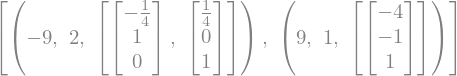

In [2]:
A = sympy.Matrix([[7, 4, -4], [4, -8, -1], [-4, -1, -8]])
A.eigenvects()

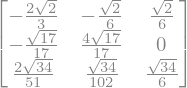

In [3]:
v1 = A.eigenvects()[1][2][0].T
v2 = A.eigenvects()[0][2][0].T
v3 = A.eigenvects()[0][2][1].T

B = sympy.Matrix(sympy.GramSchmidt([v1, v2, v3], True)); B

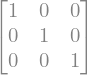

In [4]:
B.T * B

### Exercises 8.10

* (a) $~$Verify that the indicated column vectors are eigenvectors of the given matrix, $~$(b)$~$identify the corresponding eigenvalues, and $~$(c)$~$verify that the column vectors are orthogonal

  $\begin{pmatrix}
 3 & 2 & 2\\ 
 2 & 2 & 0\\ 
 2 & 0 & 4
\end{pmatrix}, \;\;
\begin{pmatrix}
-2\\ 
\phantom{-}2\\ 
\phantom{-}1
\end{pmatrix}, \;
\begin{pmatrix}
\phantom{-}1\\ 
\phantom{-}2\\ 
-2
\end{pmatrix}, \;
\begin{pmatrix}
2\\ 
1\\ 
2
\end{pmatrix}$

  $~$

* Determine whether the given matrix is orthogonal

  $\begin{pmatrix}
 0 & 1 & 0\\ 
 1 & 0 & 0\\ 
 0 & 0 & 1
\end{pmatrix}, \;\;
\begin{pmatrix}
 \phantom{-}0 & 0 & 1\\ 
 -\frac{12}{13}& \frac{5}{13} & 0\\ 
 \phantom{-}\frac{5}{13}&  \frac{12}{13}& 0
\end{pmatrix}$

* Construct an orthogonal matrix from the eigenvectors of the given symmetric matrix (The answers are not unique)

  $\begin{pmatrix}
 1 & 9 \\ 
 9 & 1
\end{pmatrix}, \;\;
\begin{pmatrix}
 -8 & 5 & 4\\ 
 \phantom{-} 5 & 3 & 1\\ 
 \phantom{-} 4 & 1 & 0
\end{pmatrix}$

  $~$

* (a)$~$Verify that the indicated column vectors are eigenvectors of the given symmetric matrix and $~$(b)$~$ identify the corresponding eigenvalues. $~$(c)$~$Use Gram-Schmidt process to construct an orthogonal matrix $\mathbf{P}$ from the eigenvectors

  $\mathbf{A}=
\begin{pmatrix}
 0 & 2 & 2\\ 
 2 & 0 & 2\\ 
 2 & 2 & 0
\end{pmatrix}; \;\; \mathbf{k}_1=\begin{pmatrix}
\phantom{-}1\\ -1\\ \phantom{-}0
\end{pmatrix}, \;\; \mathbf{k}_2=\begin{pmatrix}
\phantom{-}1\\ \phantom{-}0\\ -1
\end{pmatrix}, \;\; \mathbf{k}_3 = \begin{pmatrix}
1 \\ 1 \\ 1
\end{pmatrix}$

* Suppose $\mathbf{A}$ and $\mathbf{B}~$ are $~n\times n$ orthogonal matrices. Then show that $\mathbf{AB}~$ is orthogonal

  $~$

* Suppose $\mathbf{A}$ is an orthogonal matrix. $~$Is $\mathbf{A}^2~$ is orthogonal

  $~$

* Suppose $\mathbf{A}~$ is an orthogonal matrix. $~$Then show that $\mathbf{A}^{-1}$ is orthogonal

  $~$

* Suppose $\mathbf{A}~$ is an orthogonal matrix such that $~\mathbf{A}^2=\mathbf{I}~$. $~$Then show that $\mathbf{A}^T=\mathbf{A}$

  $~$

* Show that the rotation matrix is orthogonal

## 8.11 Approximation of Eigenvalues

* Let $\lambda_1$, $\lambda_2$, $\cdots$, $\lambda_k$, $\cdots$, $\lambda_n$ denote the eigenvalues of an $n \times n$ matrix $\mathbf{A}$. The eigenvalue $\lambda_k$ is said to be the **dominant eigenvalue** of $\mathbf{A}$ if $|\lambda_k| > |\lambda_i|$, $~i=1,2,\cdots,n$, $~$but $\text{ }i \neq k$

* An eigenvector corresponding to $\lambda_k$ is called the **dominant eigenvector** of $\mathbf{A}$ 

* **Power Method**

  Let us assume that the eigenvalues of $\mathbf{A}$ are such that
  $|\lambda_1| > |\lambda_2| \geq |\lambda_3| \geq \cdots \geq |\lambda_n|$
  and that the corresponding $n$ eigenvectors $\mathbf{k}_1$, $\mathbf{k}_2$, $\cdots$, $\mathbf{k}_n$
  are linearly independent. $~$Because of this last assumption, $~n$ eigenvectors
  can serve as a basis for $\mathbb{R}^n$. $~$For any nonzero $n \times 1$ vector $\mathbf{x}_0$, 
  
  > $\mathbf{x}_0 =c_1 \mathbf{k}_1 +c_2 \mathbf{k}_2 +c_3 \mathbf{k}_3 +\cdots +c_n \mathbf{k}_n$

  We shall also assume $\mathbf{x}_0$ is chosen so that $c_1 \neq 0$. $\text{ }$We do the following procedure
  
  >${\scriptsize
  \begin{align*}
     \mathbf{A}\mathbf{x}_0 &= c_1 \mathbf{A}\mathbf{k}_1 +c_2 \mathbf{A}\mathbf{k}_2 
         +c_3 \mathbf{A}\mathbf{k}_3 +\cdots +c_n \mathbf{A}\mathbf{k}_n\\ 
     &\;\big\Downarrow \;\;\mathbf{x}_i=\mathbf{A}\mathbf{x}_{i -1}, \;\mathbf{A}\mathbf{k}_j=\lambda_j \mathbf{k}_j\\ 
     \mathbf{x}_1 &= c_1 \lambda_1\mathbf{k}_1 +c_2 \lambda_2\mathbf{k}_2 
         +c_3 \lambda_3\mathbf{k}_3 +\cdots +c_n \lambda_n\mathbf{k}_n\\ 
     &\Downarrow \\
     \mathbf{A}\mathbf{x}_1 &= c_1 \lambda_1\mathbf{A}\mathbf{k}_1 +c_2 \lambda_2\mathbf{A}\mathbf{k}_2 
         +c_3 \lambda_3\mathbf{A}\mathbf{k}_3 +\cdots +c_n \lambda_n\mathbf{A}\mathbf{k}_n\\ 
     &\Downarrow \\
     \mathbf{x}_2 &= c_1 \lambda_1^2\mathbf{k}_1 +c_2 \lambda_2^2\mathbf{k}_2 
         +c_3 \lambda_3^2\mathbf{k}_3 +\cdots +c_n \lambda_n^2\mathbf{k}_n\\
     &\Downarrow \\
     \mathbf{x}_m &= c_1 \lambda_1^m\mathbf{k}_1 +c_2 \lambda_2^m\mathbf{k}_2 
         +c_3 \lambda_3^m\mathbf{k}_3 +\cdots +c_n \lambda_n^m\mathbf{k}_n\\ 
     &= \lambda_1^m \left[c_1 \mathbf{k}_1 +c_2 \left(\frac{\lambda_2}{\lambda_1}\right)^m\mathbf{k}_2 
         +c_3 \left(\frac{\lambda_3}{\lambda_1}\right)^m\mathbf{k}_3 +\cdots +c_n \left(\frac{\lambda_n}{\lambda_1}\right)^m\mathbf{k}_n \right]\\        &\;\big\Downarrow \;\;m \rightarrow \infty\\
     \mathbf{x}_m &\simeq \lambda_1^m c_1 \mathbf{k}_1   
  \end{align*} } 
  $

  Since a nonzero constant multiple of an eigenvalue is an eigenvector, $~$for large values of $m$ and under all the assumptions
  that were made, $~$the $n \times 1$ vector $\mathbf{x}_m$ is an approximation to a dominant eigenvector associated with
  the dominant eigenvalue $\lambda_1$
  
  If $\mathbf{x}_m$ is an approximation to a dominant eigenvector, $~$then the dominant eigenvalue $\lambda_1$ can be approximated by
  the **Rayleigh quotient**
  
  >$\displaystyle
   \lambda_1=\frac{\mathbf{A}\mathbf{x}_m \cdot \mathbf{x}_m}{\mathbf{x}_m \cdot \mathbf{x}_m}
  $
  
  Iteration often results in vectors whose entries become very large. $~$Large numbers can cause a problem in computation. One way around
  this difficulty is to use a **scaled-down** normalized vector
  
  >$\displaystyle
  \mathbf{x}_m \leftarrow 
    \frac{\mathbf{x}_m}{\left \| \mathbf{x}_m \right \|}
  $

<a href="https://colab.research.google.com/github/SeoulTechPSE/EngMath/blob/master/codes/ch08_code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

In [ ]:
%run ./codes/ch08_code1.ipynb

* **Method of Deflation**

  After we have found the dominant eigenvalue $\lambda_1$ of a matrix $\mathbf{A}$, $~$it may still be necessary to find
  nondominant eigenvalues. $~$We will limit the discussion to the case where $\mathbf{A}$ is a *symmetric* matrix.
  
  Suppose $\lambda_1$ and $\mathbf{k}_1$ are, respectively, the dominant eigenvalue and a corresponding *normalized* eigenvector of
  a symmetric matrix $\mathbf{A}$. $~$Furthermore, $~$suppose the eigenvalues of $\mathbf{A}$ are such that
  
  > $|\lambda_1| > |\lambda_2| > |\lambda_3| > \cdots > |\lambda_n|$
  
  In this case, the matrix
  
  > $\mathbf{A}_1 =\mathbf{A} -\lambda_1\mathbf{k}_1\mathbf{k}_1^T$
  
  has eigenvalues $0$, $|\lambda_2|$, $|\lambda_3|$, $\cdots$, $|\lambda_n|$ and that eigenvectors of $\mathbf{A}_1$ are also eigenvectors 
  of $\mathbf{A}$. $~$Note that $\lambda_2$ is now the dominant eigenvalue of $\mathbf{A}_1$.
 
 
<a href="https://colab.research.google.com/github/SeoulTechPSE/EngMath/blob/master/codes/ch08_code2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

In [ ]:
%run ./codes/ch08_code2.ipynb

* **Inverse Power Method**

  If we want to find the smallest eigenvalue instead of the largest one, then we perform power
  iteration for $\mathbf{A}^{−1}$ (since the eigenvalues of $\mathbf{A}^{-1}$ are the reciprocals of the eigenvalues of
  $\mathbf{A}$). Of course, $~$we do not want to compute $\mathbf{A}^{-1}$

 
<a href="https://colab.research.google.com/github/SeoulTechPSE/EngMath/blob/master/codes/ch08_code3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

In [ ]:
%run ./codes/ch08_code3.ipynb

## 8.12 Diagonalization

<font color='red'>For an $n \times n$ matrix $\mathbf{A}$, $~$can we find an $n \times n\,$ nonsingular matrix $\mathbf{P}$ such that 
$\mathbf{P}^{-1}\mathbf{A}\mathbf{P}=\mathbf{D}$ is a diagonal matrix?</font>

* An $n \times n$ matrix $\mathbf{A}$ is diagonalizable if and only if $\mathbf{A}$ has $n$ linearly independent eigenvectors

  Let $\mathbf{k}_1$, $\mathbf{k}_2$, $\cdots$, $\mathbf{k}_n$ be linearly independent eigenvectors corresponding to 
  eigenvalues $\lambda_1$, $\lambda_2$, $\cdots$, $\lambda_n$. $~$Next form the matrix $~\mathbf{P}~$ with column vectors
  $~\mathbf{k}_1$, $\mathbf{k}_2$, $\cdots$, $\mathbf{k}_n$
  
  >$
  \mathbf{P}= \begin{pmatrix}
    \mathbf{k}_1 & \mathbf{k}_2 & \cdots & \mathbf{k}_n
  \end{pmatrix}
  $
  
  We can wrtie the product $\mathbf{A}\mathbf{P}$ as
  
  >$
  \begin{align*}
   \mathbf{A}\mathbf{P}
      &= 
      \begin{pmatrix}
        \mathbf{A}\mathbf{k}_1 & \mathbf{A}\mathbf{k}_2 & \cdots & \mathbf{A}\mathbf{k}_n 
      \end{pmatrix} =
      \begin{pmatrix}
        \lambda_1\mathbf{k}_1 & \lambda_2\mathbf{k}_2 & \cdots & \lambda_n\mathbf{k}_n 
      \end{pmatrix} \\
      &=\begin{pmatrix}
           \mathbf{k}_1 & \mathbf{k}_2 & \cdots & \mathbf{k}_n
        \end{pmatrix}
        \begin{pmatrix}
           \lambda_1 &  &  & \\ 
                     & \lambda_2 &  & \\ 
                     &  & \ddots & \\ 
                     &  &  & \lambda_n
        \end{pmatrix}=\mathbf{P}\mathbf{D}
  \end{align*}  
  $
  
  Multiplying the last equation on the left by $\mathbf{P}^{-1}$ then gives $\mathbf{P}^{-1}\mathbf{A}\mathbf{P}=\mathbf{D}$

><img src="figures/ch08_figure04.png" width="500">

* If an $n \times n$ matrix $\mathbf{A}$ has $n$ distinct eigenvalues, $~$it is diagonalizable
* An $n \times n$ matrix $\mathbf{A}$ can be *orthogonally* diagonalized if and only if $\mathbf{A}$ is symmetric

**Example:** $\text{ }$ Diagonalize

  >$\mathbf{A}=
  \left(\begin{array}{rrr}
    9 & 1 & 1\\ 
    1 & 9 & 1\\ 
    1 & 1 & 9
  \end{array}\right)
  $
  
  The eigenvalues and corresponding orthogonal eigenvectors are
  
  >$\lambda_1=11$, $\lambda_2=\lambda_3=8$
  
  >$\mathbf{k}_1=
  \left(\begin{array}{r}
    1\\ 
    1\\ 
    1
  \end{array}\right),  
  \mathbf{k}_2=
  \left(\begin{array}{r}
   -2\\ 
    1\\ 
    1
  \end{array}\right) \text{ and } 
  \mathbf{k}_3=
  \left(\begin{array}{r}
    0\\ 
    1\\ 
   -1
  \end{array}\right)
  $  
  

  Multiplying these vectors, in turn, by the reciprocals of the norms $\left \| \mathbf{k}_1 \right \|=\sqrt{3}$,
  $\text{ }\left \| \mathbf{k}_2 \right \|=\sqrt{6}\text{ }$ and $\text{ }\left \| \mathbf{k}_3 \right \|=\sqrt{2}$,
  $~$we obtain an orthonormal set
  
  >$
  \mathbf{k}_1=
  \left(\begin{array}{r}
    \frac{1}{\sqrt{3}}\\ 
    \frac{1}{\sqrt{3}}\\ 
    \frac{1}{\sqrt{3}}
  \end{array}\right),  
  \mathbf{k}_2=
  \left(\begin{array}{r}
    -\frac{2}{\sqrt{6}}\\ 
     \frac{1}{\sqrt{6}}\\ 
     \frac{1}{\sqrt{6}}
  \end{array}\right) \text{ and } 
  \mathbf{k}_3=
  \left(\begin{array}{r}
    0\;\\ 
    \frac{1}{\sqrt{2}}\\ 
   -\frac{1}{\sqrt{2}}
  \end{array}\right)
  $
  
  We then use these vectors as columns to construct an orthogonal matrix that diagonalizes $\mathbf{A}$
  
  >$\mathbf{P}=
  \left(\begin{array}{rrr}
    \frac{1}{\sqrt{3}} & -\frac{2}{\sqrt{6}} &  0\;\\ 
    \frac{1}{\sqrt{3}} &  \frac{1}{\sqrt{6}} &  \frac{1}{\sqrt{2}}\\ 
    \frac{1}{\sqrt{3}} &  \frac{1}{\sqrt{6}} & -\frac{1}{\sqrt{2}}
  \end{array}\right)  
  $

  This transforms $\mathbf{A}$ to $\mathbf{D}$
  
  >$\mathbf{P}^{-1}\mathbf{A}\mathbf{P}=\mathbf{P}^{T}\mathbf{A}\mathbf{P}=
   \begin{pmatrix}
    11 & 0 & 0\\ 
     0 & 8 & 0\\ 
     0 & 0 & 8
   \end{pmatrix}=\mathbf{D}$
   
   The entries in $\mathbf{D}$ are the eigenvalues of $\mathbf{A}$ and the order in which these numbers 
   appear on the diagonal corresponds to the order in which the eigenvectors are used as columns 
   in the matrix $\mathbf{P}$

**Example - Quadratic Forms:** $\text{ }$ Identify the conic section whose equation $\,2x^2 +4xy -y^2 =1$

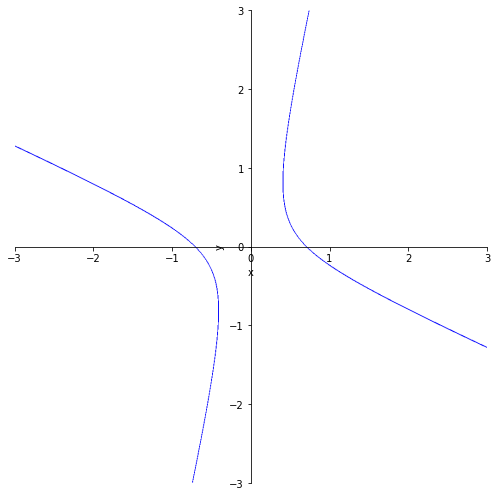

In [5]:
from sympy import plot_implicit, symbols, Eq
x, y = symbols('x y')

p1 = plot_implicit(Eq(2*x**2 + 4*x*y - y**2, 1), (x, -3, 3), (y, -3, 3), aspect_ratio=(1, 1), size=(7, 7))


 We can write the given equation as
  
  >$
  \begin{pmatrix}
    x & y
  \end{pmatrix}
  \left(\begin{array}{rr}
    2 & 2\\ 
    2 &-1 
  \end{array}\right)
  \begin{pmatrix}
    x \\ 
    y
  \end{pmatrix}
  =1 \;\text{ or }\; \mathbf{x}^T\mathbf{A}\mathbf{x}=1
  $
  
  The eigenvalues and corresponding eigenvectors of $\mathbf{A}$ are found to be
  
  >$\lambda_1=-2$, $\text{ }\lambda_2=3$, $\text{ }\mathbf{k}_1=\left(\begin{array}{r} 1\\ -2 \end{array}\right)$,
  >$\text{ }\mathbf{k}_2=\left(\begin{array}{r} 2\\ 1 \end{array}\right)$

  Observe that $\mathbf{k}_1$ and $\mathbf{k}_2$ are orthogonal. $\text{ }$Moreover, 
  $\text{ }\left \| \mathbf{k}_1 \right \| =\left \| \mathbf{k}_2 \right \| =\sqrt{5}$, $~$and so the vectors
  
  >$\mathbf{k}_1=\left(\begin{array}{r} \frac{1}{\sqrt{5}}\\ -\frac{2}{\sqrt{5}} \end{array}\right)\text{ }$ $\text{and}$
  >$\text{ }\mathbf{k}_2=\left(\begin{array}{r} \frac{2}{\sqrt{5}}\\ \frac{1}{\sqrt{5}} \end{array}\right)$
  
  are orthogonal. $~$Hence, $~$the matrix
  
  >$\mathbf{P}=
     \left(\begin{array}{rr} \frac{1}{\sqrt{5}} & \frac{2}{\sqrt{5}}\\ 
    -\frac{2}{\sqrt{5}} & \frac{1}{\sqrt{5}}
    \end{array}\right)
  $
  
  is orthogonal

 If we define the change of variables $\text{ }\mathbf{x}=\mathbf{P}\mathbf{\hat{x}}\text{ }$ 
  where $\mathbf{\hat{x}}=\begin{pmatrix} \hat{x} \\ \hat{y} \end{pmatrix}$, $~$then the quadratic form can
  be written
  
  >$\mathbf{x}^T\mathbf{A}\mathbf{x}=
   \mathbf{\hat{x}}^T\mathbf{P}^T\mathbf{A}\mathbf{P}\mathbf{\hat{x}}
   =\mathbf{\hat{x}}^T\mathbf{D}\mathbf{\hat{x}}=
   \begin{pmatrix}
     \hat{x} & \hat{y}
   \end{pmatrix}
   \left(\begin{array}{rr}
    -2 & 0\\ 
     0 & 3 
   \end{array}\right)
   \begin{pmatrix}
     \hat{x} \\ 
     \hat{y}
   \end{pmatrix}=1\;\;\text{or}\;\; -2\hat{x}^2 +3\hat{y}^2 =1$
  
  This last equation is recognized as the standard form of a hyperbola
  
> <img src="figures/ch08_figure05.png?raw=1" width="350"> 

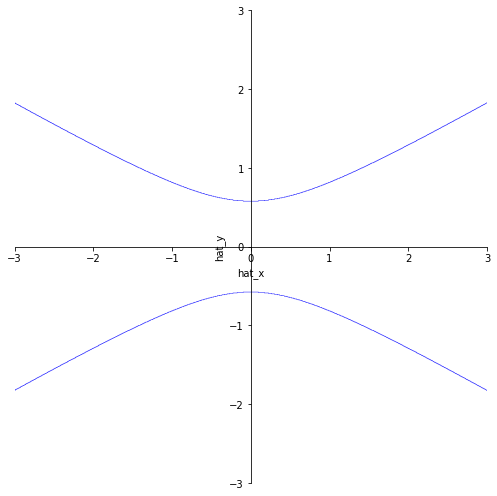

In [6]:
hat_x, hat_y = symbols('hat_x hat_y')

p1 = plot_implicit(Eq(-hat_x**2 + 3*hat_y**2, 1), (hat_x, -3, 3), (hat_y, -3, 3), aspect_ratio=(1, 1), size=(7, 7))


### Exercises 8.12

* Determine whether the given matrix $\mathbf{A}$ is diagonalizable. $~$If so, find the matrix $\mathbf{P}$ that diagonalizes $\mathbf{A}$ and the disgonal matrix $\mathbf{D}$ such that $\mathbf{D}=\mathbf{P}^{-1}\mathbf{AP}$

  $\begin{pmatrix}
 -9 & 13\\ 
 -2 & 6
\end{pmatrix}, \;\; \begin{pmatrix}
 1 & -1 & 1 \\ 
 0 & \phantom{-}1 & 0\\ 
 1 &  -1&  1
\end{pmatrix}, \;\;\begin{pmatrix}
 1 & \phantom{-}2 & 0\\ 
 2 & -1 & 0\\ 
 0 & \phantom{-}0 & 1
\end{pmatrix}$

  $~$

* The given matrix $\mathbf{A}$ is symmetric. $~$Find an orthogonal matrix $\mathbf{P}$ that diagonalizes $\mathbf{A}$ and the diagonal matrix $\mathbf{D }$ such that $\mathbf{D}=\mathbf{P}^T\mathbf{AP}$

  $\begin{pmatrix}
 1 & 1\\ 
 1 & 1
\end{pmatrix}, \;\; \begin{pmatrix}
 0 & 1 & 0 \\ 
 1 & 0 & 0\\ 
 0 & 0 &  1
\end{pmatrix}, \;\;\begin{pmatrix}
 1 & 0 & 7\\ 
 0 & 1 & 0\\ 
 7 & 0 & 1
\end{pmatrix}$

* Identify the given conic section

  $5x^2 -2xy +5y^2 =24$
  
  $-3x^2 +8xy +3y^2 =20$
  
  $~$
  
* Find $3 \times 3~$ symmetric matrix that has eigenvalues $~\lambda_1=1$, $~\lambda_2=3$, and $~\lambda_3=5$ and corresponding eigenvectors

  $\mathbf{k}_1 = \begin{pmatrix}
  \phantom{-}1 \\ -1 \\ 1
\end{pmatrix}, \;\;
\mathbf{k}_2 = \begin{pmatrix}
  \phantom{-}1 \\ \phantom{-}0 \\ -1
\end{pmatrix}, \;\;
\mathbf{k}_3 = \begin{pmatrix}
  1 \\ 2 \\ 1
\end{pmatrix}$

* If $\mathbf{A}$ is an $n\times n~$ diagonalizable matrix, then $\mathbf{D}=\mathbf{P}^{-1}\mathbf{AP}$, $~$where $\mathbf{D}$ is a diagonal matrix. $~$Show that if $m$ is a positive integer,  then $\mathbf{A}^m=\mathbf{PD}^m\mathbf{P}^{-1}$

  $~$
  
* Find the indicated power of the given matrix

  $\begin{align*}
 \mathbf{A} &= \begin{pmatrix}
 1 & 1\\ 
 2 & 0
\end{pmatrix},\;\;\mathbf{A}^5\\ 
 \mathbf{A} &= \begin{pmatrix}
 6 & -10\\ 
 3 & -5
\end{pmatrix},\;\;\mathbf{A}^{10}
\end{align*}
$

* Suppose $\mathbf{A}$ is a nonsingular diagonalizable matrix. Then show that $\mathbf{A}^{-1}$ is diagonalizable

  $~$
  
* Suppose $\mathbf{A}$ is a diagonalizable matrix. $~$Is the matrix $\mathbf{P}$ unique?

## 8.13 LU Factorization

* Let $\mathbf{A}$ be a square matrix. $~$An *LU factorization* refers to the factorization of $\mathbf{A}$ into 
  two factors – a lower triangular matrix $\mathbf{L}$ and an upper triangular matrix $\mathbf{U}$:

  >$\mathbf{A}=\mathbf{L}\mathbf{U}$
  
* Without a proper ordering or permutations in the matrix, $~$the factorization may fail to materialize. 
  $~$This is a procedural problem. $~$It can be removed by simply reordering the rows of $\mathbf{A}$.
  $~$It turns out that a proper permutation in rows (or columns) is sufficient for LU factorization. 
  $~$LU factorization with partial pivoting (LUP) refers often to LU factorization with row permutations only
  
  >$\mathbf{P}\mathbf{A}=\mathbf{L}\mathbf{U}$
  
  where $\mathbf{P}$ is a permutation matrix, which, when left-multiplied to $\mathbf{A}$, reorders the rows of $\mathbf{A}$. 
  $~$It turns out that all square matrices can be factorized in this form

* If $\mathbf{A}$ is invertible, then it admits an LU factorization if and only if all its leading principal minors are nonzero. 
  $~$If $\mathbf{A}$ is a singular matrix of rank $k$, $~$then it admits an LU factorization if the first $k$ leading principal minors are nonzero

* LU decomposition is basically a modified form of Gaussian elimination. $~$We transform the matrix $\mathbf{A}$ into 
  an upper triangular matrix $\mathbf{U}$ by eliminating the entries below the main diagonal. 
  $~$The **Doolittle algorithm** does the column-by-column elimination, starting from the left, by multiplying $\mathbf{A}$ to 
  the left with atomic lower triangular matrices. It results in a *unit* lower triangular matrix and an upper triangular matrix

**Doolittle Algorithm**

* We define

  >$\mathbf{A}^{(0)}=\mathbf{A}$
  
* We eliminate the matrix elements below the main diagonal in the $k$-th column of $\mathbf{A}^{(k -1)}$ 
  by adding to the $i$-th row of this matrix the $k$-th row multiplied by
  
  >$\displaystyle l_{i,k}=\frac{a_{i,k}^{(k-1)}}{a_{k,k}^{(k-1)}}$ $\text{ for } i=k+1, \cdots, n$

  This can be done by multiplying $\mathbf{A}^{(k -1)}$ to the left with the lower triangular matrix
  
  >${\scriptsize
  \mathbf{L}_k=
     \begin{pmatrix}
         1      & 0      &           & \cdots &        & 0      \\ 
         0      & \ddots & \ddots    &        &        &        \\ 
                &        & 1         &        &        &        \\ 
        \vdots  &        &-l_{k+1,k} &        &        & \vdots \\ 
                &        & \vdots    &        & \ddots & 0      \\ 
         0      &        &-l_{n,k}   &        & 0      & 1
     \end{pmatrix}} 
  $

* We set
  
  >$\mathbf{A}^{(k)}=\mathbf{L}_k\mathbf{A}^{(k-1)}$, $k=1,\cdots,n -1$
  
  After $n -1$ steps, $~$we eliminated all the matrix elements below the main diagonal, 
  $~$so we obtain an upper triangular matrix $\mathbf{A}^{(n -1)}$. $~$We find the decomposition
  
  >$
   \mathbf{A}=\mathbf{L}_1^{-1}\mathbf{L}_1\mathbf{A}^{(0)}=\mathbf{L}_1^{-1}\mathbf{A}^{(1)}
     =\mathbf{L}_1^{-1}\mathbf{L}_2^{-1}\mathbf{L}_2\mathbf{A}^{(1)}=\mathbf{L}_1^{-1}\mathbf{L}_2^{-1}\mathbf{A}^{(2)}
     =\cdots=\mathbf{L}_1^{-1}\cdots\mathbf{L}_{n -1}^{-1}\mathbf{A}^{(n -1)}
  $
  
  Denote the upper triangular matrix $\mathbf{A}^{(n -1)}$ by $\mathbf{U}$, $~$and $\mathbf{L}=\mathbf{L}_1^{-1}\cdots\mathbf{L}_{n -1}^{-1}$. 

  Because the inverse of a lower triangular matrix $\mathbf{L}_k$ is again a lower triangular matrix, 
  and the multiplication of two lower triangular matrices is again a lower triangular matrix, 
  it follows that $\mathbf{L}$ is a lower triangular matrix. Moreover, it can be seen that
  
  >${\scriptsize
  \mathbf{L}=
     \begin{pmatrix}
         1      & 0      &           & \cdots &          & 0      \\ 
         l_{2,1}& \ddots & \ddots    &        &          &        \\ 
                &        & 1         &        &          &        \\ 
        \vdots  &        & l_{k+1,k} &        &          & \vdots \\ 
                &        & \vdots    &        & 1        & 0      \\ 
         l_{n,1}& \cdots & l_{n,k}   & \cdots & l_{n,n-1}& 1
     \end{pmatrix}}  
  $
  
  We obtain $\mathbf{A}=\mathbf{L}\mathbf{U}$
  
  **NOTE:** It is clear that in order for this algorithm to work, one needs to have $a_{k,k}^{(k-1)}$ at each step 
  (see the definition of $l_{i,k}$). If this assumption fails at some point, one needs to interchange $k$-th row 
  with another row below it before continuing. This is why an LU decomposition in general looks like 
  $\mathbf{P}\mathbf{A}=\mathbf{L}\mathbf{U}$

<a href="https://colab.research.google.com/github/SeoulTechPSE/EngMath/blob/master/codes/ch08_code4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

In [ ]:
%run ./codes/ch08_code4.ipynb


In [ ]:
import pprint
import numpy as np
from scipy.linalg import lu

A = np.array([[7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6]], dtype='float64')
P, L, U = lu(A)

print('P ='); pprint.pprint(P)
print('\nL ='); pprint.pprint(L)
print('\nU ='); pprint.pprint(U)

* **Solving Linear Equations**

  Given a system of linear equations in matrix form
  
  >$\mathbf{A}\mathbf{x}=\mathbf{b}$
  
  Suppose we have already obtained the LUP decomposition of $\mathbf{A}$ such that 
  $\mathbf{P}\mathbf{A}=\mathbf{L}\mathbf{U}$, so $\mathbf{L}\mathbf{U}\mathbf{x}=\mathbf{P}\mathbf{b}$
  
  In this case the solution is done in two logical steps:

  * First, $~$we solve the equation $\mathbf{L}\mathbf{y}=\mathbf{P}\mathbf{b}$ for $\mathbf{y}$  
  * Second, $~$we solve the equation $\mathbf{U}\mathbf{x}=\mathbf{y}$ for $\mathbf{x}$

 
  * Note that in both cases we are dealing with triangular matrices ($\mathbf{L}$ and $\mathbf{U}$), 
  which can be solved directly by forward and backward substitution without using the Gaussian elimination process 
  (however we do need this process or equivalent to compute the LU decomposition itself). 
  The cost of solving a system of linear equations is approximately $\frac{2}{3}n^{3}$ floating-point operations.
    
  * The above procedure can be repeatedly applied to solve the equation multiple times for different $\mathbf{b}$. 
  $~$In this case it is faster (and more convenient) to do an LU decomposition of the matrix $\mathbf{A}$ 
  once and then solve the triangular matrices for the different $\mathbf{b}$, rather than using Gaussian 
  elimination each time. 
  The matrices $\mathbf{L}$ and $\mathbf{U}$ could be thought to have *encoded* the Gaussian elimination process
    

<a href="https://colab.research.google.com/github/SeoulTechPSE/EngMath/blob/master/codes/ch08_code5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>    

In [ ]:
%run ./codes/ch08_code5.ipynb


* **Inverting a Matrix**

  In matrix inversion, instead of vector $\mathbf{b}$, $~$we have matrix $\mathbf{I}_n$ so that we are trying to find a matrix $\mathbf{X}$
  
  >$\mathbf{L}\mathbf{U}\mathbf{X}=\mathbf{I}_n$
  
  We can use the same algorithm presented earlier to solve for each column of matrix $\mathbf{X}$
  
* **Computing the Determinant**

  Given the LUP decomposition $\mathbf{A}=\mathbf{P}^{-1}\mathbf{L}\mathbf{U}$ of a square matrix $\mathbf{A}$, 
  $~$the determinant of $\mathbf{A}$ can be computed straightforwardly as
  
  >$\displaystyle\mathrm{det}\,\mathbf{A}=\mathrm{det}\,\mathbf{P}^{-1}\,\mathrm{det}\,\mathbf{L}\,
  \mathrm{det}\,\mathbf{U}=(-1)^s \prod_{i=1}^n l_{ii}\prod_{i=1}^n u_{ii}$
   
  where $s$ is the number of row exchanges in the permutation matrix

### Exercises 8.13

* Find the LU factorization of the given matrix

    $\begin{pmatrix}
 2 & -2\\ 
 1 & \phantom{-}2
\end{pmatrix}, \;\; \begin{pmatrix}
 -1 & 4 \\ 
 \phantom{-}2 & 2
\end{pmatrix}, \;\;\begin{pmatrix}
 \phantom{-}4 & -2 & 1\\ 
 -4 & 1 & 2\\ 
 12 & 1 & 3
\end{pmatrix}$

  $~$

* Use the LU factorization to solve the given linear system of equations

  $\begin{pmatrix} 2 & -2 \\ 1 & \phantom{-}2\end{pmatrix}
  \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = 
  \begin{pmatrix} \phantom{-}1 \\-2 \end{pmatrix}$

  $\begin{pmatrix} 
    \phantom{-}4 & -2 & 1 \\ -4 & \phantom{-}1 & 2\\12 & \phantom{-}1 & 3
  \end{pmatrix}
  \begin{pmatrix} x_1 \\ x_2 \\x_3 \end{pmatrix} = 
  \begin{pmatrix} 7 \\ 7\\28 \end{pmatrix}$


## 8.14 Applications

* **Cryptography**

  Cryptography is the study of making *secret writings* or *codes*. $~$We will consider a system of encoding and decoding
  messages that requires both the sender and the receiver to know:
  
  * a specified rule of correspondence between a set of symbols and a set of integers; and 
  * a specified *nonsingular* matrix $\mathbf{A}$

  **Example:** $\text{ }$ A correspondence between the twenty-seven integers and the letters of the alphabet and a blank space is given by
  
  >$\scriptsize
   \begin{align*}
     &\begin{matrix}
       0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 &10 &11 &12 &13 &14 &15 &16 &17 &18 &19 &20 \\ 
       \text{space} & j & k & l & n & m & s & t & u & w & x & g & h & i & o & p & q & r & v & y & z    
      \end{matrix} \\ 
   & \\
   &\;\text{ }  
   \begin{matrix}
       21 &22 &23 &24 &25 &26 \\ 
       a & b & c & d & e & f   
     \end{matrix} 
   \end{align*}$
  
  The numerical equivalent of the message **DR JOHN IS A DOUBLE SPY** is 
  
  > $\scriptsize\begin{matrix}
        24 & 17 & 0 & 1 & 14 & 12 & 4 & 0 & 13 & 6 & 0 & 21 & 0 & 24 & 14 & 8 & 22 & 3 & 25 & 0 & 6 & 15 & 19
      \end{matrix}$

  The sender will **encode** the message by means of the nonsingular matrix $\mathbf{A}$ and the receiver will **decode**
  the encoded message by means of the matrix $\mathbf{A}^{-1}$. $~$We choose to write the numerical message as the $3 \times 8$ matrix
  
  >$
  \mathbf{M}=
    \left(\begin{array}{rrrrrrrr}
      24 & 17 & 0 & 1 & 14 & 12 & 4 & 0 \\ 
      13 & 6 & 0 & 21 & 0 & 24 & 14 & 8 \\ 
      22 & 3 & 25 & 0 & 6 & 15 & 19 & 0 
    \end{array}\right)  
  $
  
  Note that the last entry $m_{38}$ has been simply padded with a space (the number $0$). $~$A $3 \times 8$ matrix allows us
  to encode the message by means of a $3 \times 3$ matrix. The encoding matrix $\mathbf{A}$ is constructed, so that
  
  * $\mathbf{A}$ is nonsingular
  * $\mathbf{A}$ has only integer entries, and
  * $\mathbf{A}^{-1}$ has only integer entries

  To accomplish the last criterion, $~$we need only select the integer entries of $\mathbf{A}$ in such a manner that 
  $\mathrm{det}\,\mathbf{A}=\pm 1$. $~$We choose
      
  >$
  \mathbf{A}=
    \left(\begin{array}{rrr}
        -1 & 0 &-1 \\
        2 & 3 & 4 \\
        2 & 4 & 5
     \end{array}\right) 
  $
  
  and
  
  >$
  \mathbf{A}^{-1}=
    \left(\begin{array}{rrr}
        1 & 4 &-3 \\
        2 & 3 &-2 \\
       -2 &-4 & 3
     \end{array}\right)  
  $  
      
  You should verify that $\mathrm{det}\,\mathbf{A}=-1$.

 The original message is encoded as following:
      
  >${\scriptsize\mathbf{B}=\mathbf{A}\mathbf{M}=
    \left(\begin{array}{rrrrrrrr}
     -46 & -20 & -25 & -1 & -20 & -27 & -23 & 0 \\ 
     175 &  64 & 100 & 65 & 52 & 156 & 126 & 24 \\ 
     210 &  73 & 125 & 86 & 58 & 195 & 159 & 32 
    \end{array}\right)}   
  $
  
  It may be desirable to send the encoded message as letters of the alphabet rather than as numbers. 
  Thus we rewrite $\mathbf{B}$ as $\mathbf{B}'$ using integers modulo 27:
  
  >${\scriptsize\mathbf{B'}=
    \left(\begin{array}{rrrrrrrr}
     8 & 7 & 2 & 26 & 7 & 0 & 4 & 0 \\ 
     13 &  10 & 19 & 11 & 25 & 21 & 18 & 24 \\ 
     21 &  19 & 17 & 5 & 4 & 6 & 24 & 5 
    \end{array}\right)}   
  $ 
  
  The encoded message to be sent in letters is
  
  > **UTKFT N IXYGEAVDAYRMNSDM**

In [ ]:
import numpy as np

#-- Data for Encoding and Decoding------------------------------------

cp = { 0:' ',  1:'j',  2:'k',  3:'l',  4:'n',  5:'m',  6:'s',  7:'t',    
       8:'u',  9:'w', 10:'x', 11:'g', 12:'h', 13:'i', 14:'o', 15:'p',  
      16:'q', 17:'r', 18:'v', 19:'y', 20:'z', 21:'a', 22:'b', 23:'c', 
      24:'d', 25:'e', 26:'f' }

A = np.array([[-1, 0, -1], [2, 3, 4], [2, 4, 5]])

inv_cp =  {v: k for k, v in cp.items()}
inv_A = np.rint(np.linalg.inv(A)).astype('int32')

#----------------------------------------------------------------------

In [ ]:
def convert_to_numeric(message):   
    return np.array([inv_cp[m] for m in message])

def convert_to_letter(numeric_message):
    return ''.join([cp[m] for m in numeric_message])

def encoding_message(message):  
    
    numeric_message = convert_to_numeric(message)
    
    n_app = (3 -len(numeric_message) % 3) % 3
    M = np.append(numeric_message, [0]*n_app).reshape(3, -1)
    B = (A @ M) % 27

    numeric_message_encoded = B.flatten()
    
    return convert_to_letter(numeric_message_encoded)

In [ ]:
message = 'dr john is a double spy'
message_encoded = encoding_message(message)

print('Message =', message.upper())
print('Encoded message =', message_encoded.upper())

You should try to imagine the difficulty of decoding the encoded message without prior knowledge. 
$~$Using the original correspondence and $\mathbf{A}$, $~$the decoding is the straightforward computation

> $\mathbf{M}=\mathbf{A}^{-1}\mathbf{B}'$

In [ ]:
def decoding_message(message_encoded):
    
    B_ = convert_to_numeric(message_encoded).reshape(3, -1)
    M_ = (inv_A @ B_) % 27
    
    numeric_message_decoded = M_.flatten()
    
    return convert_to_letter(numeric_message_decoded)

message_decoded = decoding_message(message_encoded)

print('Decoding message =', message_decoded.upper())

* **An Error-Correcting Code**

  We are going to examine briefly the concept of digital communication, say, $~$communication between 
  a satellite and a computer.
  $~$As a result, $~$we will deal only with matrices whose entries are binary digits, namely $0$s and $1$s. 
  When addng and multipying such matrices,
  $~$we will use arithmetic modulo 2. This arithmetic is defined by the addition and multiplication tables


>| + | 0 | 1 |
|---|---|---| 
| **0** | 0 | 1 |
| **1** | 1 |<font color='red'> 0 </font>|

>| x | 0 | 1 |
|---|---|---| 
| **0** | 0 | 0 |
| **1** | 0 | 1 |   

* In digital communication the messages or words are binary $n$-tuples. $~$An $n$-bit word is also said 
  to be a binary string of length $n$. By **encoding** a message, $~$we mean a process whereby we transform
  a word $\mathbf{W}$ of length $n$ into another word $\mathbf{C}$ of length $n +m$ by augmenting $\mathbf{W}$
  with $m$ additional bits, $~$called **parity check bits**. $~$An encoding/decoding scheme is called a **code**
  
  The **Hamming (7, 4) code** is an encoding/decoding scheme that can detect the presence of a single error
  in a received message and can tell which bit must be corrected. In $(7, 4)$ code the encoding process
  consists of transforming a 4-bit word 
  
  >$\mathbf{W}=\begin{bmatrix} w_1 & w_2 & w_3 & w_4 \end{bmatrix}$
  
  into a 7-bit code word
  
  >$\mathbf{C}=\begin{bmatrix} \color{green}{c_1} & \color{green}{c_2} & w_1 & \color{green}{c_3} & w_2 & w_3 & w_4 \end{bmatrix}$
  
  where $c_1$, $c_2$, and $c_3$ denote the parity check bits

 and are defined in terms of the information bits $w_1$, $w_2$, $w_3$, and $w_4$
  
  >$
    \begin{align*}
        c_1 &= w_1 +w_2 +w_4\\ 
        c_2 &= w_1 +w_3 +w_4\\ 
        c_3 &= w_2 +w_3 +w_4
    \end{align*} \;\;\;\;\;\text{(C1)} 
  $ 
  
  We first observe that in modulo 2 arithmatic there are no negative numbers; $~$the additive inverse
  is $1$, not $-1$. $~$With this in mind, $~$we can write the system $\text{(C1)}$ in the equivalent form
  
  >$
    \begin{align*}
        c_3 &+ w_2 +w_3 +w_4 = 0\\
        c_2 &+ w_1 +w_3 +w_4 = 0\\        
        c_1 &+ w_1 +w_2 +w_4 = 0 
    \end{align*} \;\;\;\;\; \text{(C2)}   
  $ 
  
  These are called **parity check equations**.

 As a matrix product, $~\text{(C2)}$ can be written
  
  >$\mathbf{H}\mathbf{C}^T=\mathbf{0}$
  
  where 
  
  >$\mathbf{H}=
    \begin{pmatrix}
        0 & 0 & 0 & 1 & 1 & 1 & 1\\ 
        0 & 1 & 1 & 0 & 0 & 1 & 1\\
        1 & 0 & 1 & 0 & 1 & 0 & 1
    \end{pmatrix}$
  
  is called the **parity check matrix**. $~$A closer inspection of $\mathbf{H}$ shows 
  a surprising fact: The columns of $\mathbf{H}$, left to right, are 
  the numbers $1$ through $7$ written in binary

  Let $\mathbf{R}$ be a $1 \times 7$ matrix representing the received message. The product
  
  >$\mathbf{S}=\mathbf{H}\mathbf{R}^T$
  
  is called the **syndome** of $\mathbf{R}$. $~$If $\mathbf{S}=\mathbf{0}$, $~$it is assumed that
  the transmission is correct and that $\mathbf{R}$ is the same as the original encoded 
  message $\mathbf{C}$. $~$The decoding of the message is accomplished by simply dropping the 
  three check bits in $\mathbf{R}$
  
  Let 
  
  >$\mathbf{E}=\begin{bmatrix} e_1 & e_2 & e_3 & e_4 & e_5 & e_6 & e_7 \end{bmatrix}$
  
  be a *single-error noise* word added to $\mathbf{C}$ during its transmission.

  If noise changes the $i$-th bit, $~e_i=1$. $~$The received message is then 
  $\mathbf{R}=\mathbf{C}+\mathbf{E}$. $~$We see that
  
  >$\begin{align*}
     \mathbf{S}&=\mathbf{H}\mathbf{R}^T
            =\mathbf{H}(\mathbf{C}^T +\mathbf{E}^T)=\mathbf{H}\mathbf{E}^T\\
        &= e_1 \begin{pmatrix} 0\\ 0\\ 1\end{pmatrix}
          +e_2 \begin{pmatrix} 0\\ 1\\ 0\end{pmatrix}
          +e_3 \begin{pmatrix} 0\\ 1\\ 1\end{pmatrix}
          +e_4 \begin{pmatrix} 1\\ 0\\ 0\end{pmatrix}
          +e_5 \begin{pmatrix} 1\\ 0\\ 1\end{pmatrix} 
          +e_6 \begin{pmatrix} 1\\ 1\\ 0\end{pmatrix}
          +e_7 \begin{pmatrix} 1\\ 1\\ 1\end{pmatrix}           
    \end{align*}    
   $
   
   Hence, if $\mathbf{S}\neq\mathbf{0}$, $~$then $\mathbf{S}$ must be one of 
   the columns of $\mathbf{H}$. $~$If $\mathbf{R}$ contains a single error, $~$we see that
   the syndrome itself indicates which bit is in error.

* **Method of Least Squares**

  ><img src="figures/ch08_figure06.png" width="340">

  When performing experiments we often tabulate data in the form of ordered pairs $(x_1, y_1)$,
  $(x_2, y_2)$, $\cdots$, $(x_n, y_n)$, with each $x_i$ distinct. Given the data, it is then often
  desirable to predict $y$ from $x$ by finding a mathematical model, that is, 
  a function $f(x)$ that approximates or fits the data
  
  We shall confine our attention to the problem of finding a linear polynomial
  $f(x)=ax +b$ that best fits the data $(x_i, y_i)$, $i=1,\cdots, n$. The procedure
  for finding this linear function is known as **the method of least squares**

  One way to determine how well the linear function $f(x)=ax +b~$ fits the data is to
  measure the vertical distances between the data points $y_i$ and the graphs $f(x_i)$
  
  >$e_i=|y_i -f(x_i)|$, $\;i=1,\cdots, n$
  
  An actual approach is to find a linear function $f$ so that
  the sum of the *squares* of all the $e_i$ values is a minimum
  
  >$\displaystyle\min_{a, \,b} E=\min_{a, \,b} \sum_{i=1}^n \left[y_i -ax_i -b\right]^2$
  
  Then to find the minimum value of $E$, $~$we set the first partial derivatives with respect to
  $a$ and $b$ to zero:
  
  >$\displaystyle \frac{\partial E}{\partial a}=0 \;\text{ and }\; \frac{\partial E}{\partial b}=0$

  The last two conditions yield, in turn,
  
  >$
    \begin{align*}
        -2 \sum_{i=1}^n x_i [y_i -a x_i -b] &= 0\\ 
        -2 \sum_{i=1}^n [y_i -a x_i -b] &= 0
    \end{align*}  
  $

  Expanding the sums and rearranging, $~$we find the above system is the same as
  
  >$
    \begin{pmatrix}
     \displaystyle\sum_{i=1}^n x_i^2 & \displaystyle\sum_{i=1}^n x_i\\ 
     \displaystyle\sum_{i=1}^n x_i   & n
    \end{pmatrix}
    \begin{pmatrix}
      a \\ b
    \end{pmatrix}=
    \begin{pmatrix}
     \displaystyle \sum_{i=1}^n x_i y_i\\ \displaystyle \sum_{i=1}^n y_i \;\;\;
    \end{pmatrix}  
  $


  and, in terms of matrices, is  equivalent to 
  
  >$\mathbf{A}^T\mathbf{A}\mathbf{x}=\mathbf{A}^T\mathbf{b}$
  
  where
  
  >$
    \mathbf{A}=
    \begin{pmatrix}
     x_1 & 1\\ 
     x_2 & 1\\ 
     \vdots & \vdots\\ 
     x_n & 1 
    \end{pmatrix},
    \;\mathbf{b}=
    \begin{pmatrix}
     y_1\\
     y_2\\ 
     \vdots\\ 
     y_n
    \end{pmatrix},
    \;\mathbf{x}=
    \begin{pmatrix}
     a \\ b
    \end{pmatrix}
    \;\;\text{(LS)}
  $ 
  
  Unless the data points all lie on the same vertical line, the matrix $\mathbf{A}^T\mathbf{A}$
  is nonsingular. Thus $\text{(LS)}$ has the unique solution
  
  >$
    \mathbf{x} =\left(\mathbf{A}^T \mathbf{A} \right)^T \mathbf{A}^T \mathbf{b}
  $

**Example** $\text{ }$ Nonlinear Least Squares: $\text{ } f(x) = 2.5e^{-1.3x}$

<a href="https://colab.research.google.com/github/SeoulTechPSE/EngMath/blob/master/codes/ch08_code6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>    

In [ ]:
%run ./codes/ch08_code6.ipynb

* **Discrete Compartmental Models**

  Strontium 90 is deposited into pastureland by rainfall. To study how this material is 
  cycled through the ecosystem, $~$we divide the system into the compartments shown in the following

  ><img src="figures/ch08_figure07.png" width="600">
  
  Suppose that $\Delta t=1$ month and the transfer coefficients (which have been estimated
  experimentally) shown in the figure are measured in fraction/month.

 Suppose that rainfall has
  deposited the strotium 90 into the compartments so that
  
  >$\mathbf{x}_0=
   \begin{pmatrix}
    20 & 
    60 & 
    15 & 
    20
   \end{pmatrix}^T$
   
  Units might be grams per hectare. Compute the states of the ecosystem over the next 12 months
  
  *Solution* $~$From the data in figure, $~$we see that transfer matrix $\mathbf{T}$ is
  
  >$\scriptsize
    \mathbf{T}=
    \begin{pmatrix}
     0.85 & 0.01 & 0   & 0 \\ 
     0.05 & 0.98 & 0.2 & 0 \\ 
     0.1  & 0    & 0.8 & 0 \\ 
     0    & 0.01 & 0   & 1
    \end{pmatrix}  
  $
  
  We must compute $\mathbf{x}_1$, $\mathbf{x}_2$, $\cdots$, $\mathbf{x}_{12}$ by using
  the recursion formula $~\mathbf{x}_{n+1}=\mathbf{T}\mathbf{x}_n$

In [ ]:
T = np.array([[0.85, 0.01, 0.00, 0.00], 
              [0.05, 0.98, 0.20, 0.00],
              [0.10, 0.00, 0.80, 0.00], 
              [0.00, 0.01, 0.00, 1.00]])
x = np.array([20, 60, 15, 20]).T

print('-' * 47)
print('Month     Grasses   Soil      Dead_OM   Streams')
print('-' * 47)
for month in range(13):   
    print(f'{month:5d} {x[0]:9.2f} {x[1]:9.2f} {x[2]:9.2f} {x[3]:9.2f}')  
    x = T @ x  